In [1]:
import pandas as pd
import numpy as np
import random as rnd

# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC, LinearSVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn import preprocessing


# from sklearn.cross_validation import train_test_split , StratifiedKFold
# from sklearn.feature_selection import RFECV




In [7]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize']=8,6

def plot_correlation_map( df ):
    corr = df.corr()
    ht , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    ht = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 })

In [8]:
test=pd.read_csv('Test_Data.csv')

In [4]:
len(test)

NameError: name 'test' is not defined

In [6]:
test.id_accs.nunique()

29

In [7]:
accounts=pd.read_csv('Accounts.csv')

In [8]:
accounts.head()

id_accs  active_deals  activity_count  buyer_book  \
0  0012A000023XlCCQA0             1            2367        True   
1  0012A000023XmOxQAK             9            7974        True   
2  0012A000023YLqwQAG           891           50161        True   
3  0012A000023XlNjQAK            34           14631        True   
4  0012A000023YBFRQA4           283          194195        True   

   servicing_contract               investor_type   cmbs  consultant  \
0               False  Private Investor/Developer  False       False   
1               False                        REIT  False       False   
2                True               Bank / Thrift  False       False   
3               False                Conduit/CMBS   True       False   
4               False      Life Insurance Company  False       False   

   correspondent  foreign  master_servicer  lender_book  loan_sales_book  \
0          False    False            False        False            False   
1          False    False            False         True             True   
2          False    False            False         True             True   
3          False     True            False         True             True   
4          False    False            False         True             True   

   loan_servicing  num_deals_as_client  num_deals_as_investor  \
0           False                    0                      1   
1           False                    7                      2   
2           False                   40                    851   
3           False                    0                     34   
4           False                   63                    220   

   number_of_properties  number_of_related_deals  \
0                     1                        2   
1                    77                       18   
2                   693                      996   
3                     0                       45   
4                   393                      383   

   number_of_related_properties  number_of_won_deals_as_client  
0                             1                              0  
1                            85                              7  
2                          1167                             37  
3                            14                              0  
4                           591                             46

In [10]:
len(accounts)

2756

In [11]:
accounts.id_accs.nunique()

2756

In [9]:
def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    #print(var,l,t)
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

In [10]:
opportunities=pd.read_csv('Opportunities.csv')
opportunities.drop(['id_deals.1'],inplace=True,axis=1)

In [11]:
opportunities.head()

id_deals             id_accs accounting_date  best_initial_bid  \
0  0062A00000moF1LQAU  0012A000023XvIOQA0             NaN               NaN   
1  0062A00000moF9LQAU  0012A000023YFe1QAG             NaN               NaN   
2  0062A00000moGodQAE  0012A000023YEDcQAO       8/12/2004               NaN   
3  0062A00000moBTHQA2  0012A000023YA3nQAG             NaN               NaN   
4  0062A00000mo8OjQAI  0012A000023XpRUQA0             NaN               NaN   

    closedate      date_closed          deal_type  deal_update_flag  \
0   8/12/2005   8/18/2005 0:00         Fixed-rate              True   
1    2/6/2012  6/27/2012 12:00         Fixed-rate              True   
2  11/24/2003   8/11/2004 0:00  Construction Loan              True   
3   2/10/2006   4/19/2006 0:00         Fixed-rate              True   
4   7/13/2006  11/16/2006 0:00         Fixed-rate              True   

   debt_yield  fiscal  fiscalquarter  fiscalyear platform property_group  \
0         NaN  2005 3              3        2005     Debt     Healthcare   
1         NaN  2012 1              1        2012     Debt     Healthcare   
2         NaN  2003 4              4        2003     Debt     Healthcare   
3         NaN  2006 1              1        2006     Debt     Healthcare   
4         NaN  2006 3              3        2006     Debt     Healthcare   

  property_type  
0    Healthcare  
1       Biotech  
2       Biotech  
3    Healthcare  
4    Healthcare

In [12]:
opportunities.platform.unique()

array(['Debt', 'Equity Placement', 'Investment Sales', 'Loan Sales',
       'Securities', nan], dtype=object)

In [13]:
test.merge(opportunities,on='id_accs',how='inner')

Empty DataFrame
Columns: [id_accs, id_deals, accounting_date, best_initial_bid, closedate, date_closed, deal_type, deal_update_flag, debt_yield, fiscal, fiscalquarter, fiscalyear, platform, property_group, property_type]
Index: []

In [14]:
describe_more(opportunities)

Datatype  Levels          Variable
7      bool       2  deal_update_flag
10    int64       4     fiscalquarter
12   object       5          platform
13   object      10    property_group
11    int64      15        fiscalyear
14   object      20     property_type
6    object      27         deal_type
9    object      57            fiscal
8   float64     305        debt_yield
3   float64     875  best_initial_bid
4    object    3635         closedate
2    object    5277   accounting_date
5    object    6046       date_closed
1    object    7245           id_accs
0    object   26029          id_deals

In [18]:
opportunities['best_initial_bid_interval']=pd.cut(opportunities.best_initial_bid,5)
opportunities['debt_yield_interval1']=pd.cut(opportunities.debt_yield,10)

In [19]:
opportunities['dyi']=opportunities['debt_yield_interval1']
opportunities['bibi']=opportunities['best_initial_bid_interval']
opportunities.groupby(['debt_yield_interval1'],as_index=False).agg({'dyi':'count'})

opportunities.groupby(['best_initial_bid_interval'],as_index=False).agg({'bibi':'count'})

best_initial_bid_interval   bibi
0   (-1447139.865, 289427973.0]  25004
1    (289427973.0, 578855946.0]     19
2    (578855946.0, 868283919.0]      3
3   (868283919.0, 1157711892.0]      1
4  (1157711892.0, 1447139865.0]      1

In [21]:
opportunities[opportunities.debt_yield<0]
# opportunities[opportunities.best_initial_bid<0]

Empty DataFrame
Columns: [id_deals, id_accs, accounting_date, best_initial_bid, closedate, date_closed, deal_type, deal_update_flag, debt_yield, fiscal, fiscalquarter, fiscalyear, platform, property_group, property_type, best_initial_bid_interval, debt_yield_interval1, dyi, bibi]
Index: []

In [15]:
opportunities.id_accs.nunique()

7245

In [16]:
properties=pd.read_csv('Properties.csv')

In [17]:
properties['size_acres'].dtypes=='float64'

True

In [18]:
properties.columns

Index(['id_props', 'building_status', 'building_tax_expenses', 'id_deals',
       'city', 'class', 'county', 'sale_status', 'portfolio', 'market',
       'num_buildings', 'num_floors', 'num_parking_spaces', 'occupancy_rate',
       'price_per_sq_ft', 'price_per_unit', 'property_type_1', 'region__c',
       'sale_amount__c', 'sale_date__c', 'size_acres', 'size_sf', 'size_units',
       'year_built'],
      dtype='object')

In [82]:
def intervals(df):
#     for i in ['year_tax_1','year_ops_1','year_ops_2', 'year_tax_2','year_combined_1','year_combined_2']:
    for i in df.columns:
#         df[i]=df[i].astype('float64')
        if df[i].dtypes=='float64' or df[i].dtypes=='int64' :
            print(i)
            print(i,df[i].max(),df[i].min())
            j=6
            while j<7 and j>1:
                try:
                    df[i+'_interval']=pd.qcut(df[i],j)
                    break
                except:
                    j=j-1
            if j==1:
                j=3
                df[i+'_interval']=pd.cut(df[i],j)
            print('bins=',j)
            df[i+'count']=df[i+'_interval']
            print(df.groupby([i+'_interval'],as_index=False).agg({i+'count':'count'}))
    return df

In [21]:
Opportunity=intervals(opportunities)

best_initial_bid
best_initial_bid 1447139865.0 0.0
bins= 3
     best_initial_bid_interval  best_initial_bidcount
0  (-1447139.865, 482379955.0]                  25021
1   (482379955.0, 964759910.0]                      5
2  (964759910.0, 1447139865.0]                      2
debt_yield
debt_yield 30.0 0.0
bins= 3
  debt_yield_interval  debt_yieldcount
0       (-0.03, 10.0]            13493
1        (10.0, 20.0]              353
2        (20.0, 30.0]                5
fiscalquarter
fiscalquarter 4 1
bins= 2
  fiscalquarter_interval  fiscalquartercount
0           (0.999, 3.0]               14681
1             (3.0, 4.0]               11348
fiscalyear
fiscalyear 2016 2002
bins= 3
  fiscalyear_interval  fiscalyearcount
0  (2001.999, 2004.0]             9119
1    (2004.0, 2012.0]             8682
2    (2012.0, 2016.0]             8228


In [27]:
properties.columns

Index(['id_props', 'building_status', 'building_tax_expenses', 'id_deals',
       'city', 'class', 'county', 'sale_status', 'portfolio', 'market',
       'num_buildings', 'num_floors', 'num_parking_spaces', 'occupancy_rate',
       'price_per_sq_ft', 'price_per_unit', 'property_type_1', 'region__c',
       'sale_amount__c', 'sale_date__c', 'size_acres', 'size_sf', 'size_units',
       'year_built'],
      dtype='object')

In [28]:
expenses=properties.building_tax_expenses.str.extractall('([0-9 ]*[a-zA-Z ]*[a-zA-Z ]*[a-zA-Z/]+[ \@]+[ \$0-9\.0-9/a-zA-Z]+)')
# properties.building_tax_expenses.str.extractall('([0-9 ]*[Oo][a-zA-Z]+[ \@]+[ \$0-9\.0-9]+)')

In [29]:
properties.building_tax_expenses.str.extractall('([a-z/A-Z]+)')[0].unique()

array(['Tax', '/sf', 'Ops', 'Est', '/Unit', 'Combined', 'Tax/Ops', '/unit'], dtype=object)

In [30]:
expenses.index.names

FrozenList([None, 'match'])

In [31]:
properties[properties.index==28]

id_props building_status  \
28  a0I2A00000XQGLLUA5        Existing   

                                building_tax_expenses            id_deals  \
28  2016 Tax @ $1075.10/Unit; 2006 Combined Est Ta...  a0I2A00000XQGLLUA5   

         city    class       county sale_status  portfolio       market  \
28  City-0828  Class B  County-0436           Y      False  Market-0183   

      ...      price_per_sq_ft  price_per_unit  property_type_1  region__c  \
28    ...               216.44       182666.67    Multi-Housing       West   

    sale_amount__c  sale_date__c size_acres   size_sf  size_units year_built  
28      32650000.0    10/30/2015      10.17  189890.0       225.0     2003.0  

[1 rows x 24 columns]

In [32]:
properties.loc[properties.index==0,'building_tax_expenses']

0    2009 Tax @ $1.25/sf
Name: building_tax_expenses, dtype: object

In [147]:
k=0
j='ops'
k=k+1
properties.loc[properties.index==0,j+'y'+str(k)]=1

In [226]:
rate=re.compile('[0-9\.]+[/a-zA-Z]+')
for index,new_df in expenses.groupby(level=0):
    if index==28:
        for i in new_df.values:
            print(i[0].split())
            for j in i[0].split():
                print(j)
                if j=='Combined':
                    print('c')
                    year=i[0].split()[0]
                    print(i[0].strip())
                    cost_unit=rate.findall(i[0].strip())[0]
                    print('cu',cost_unit)
                    cost=cost_unit.split('/')[0]
                    unit=cost_unit.split('/')[1]
        break
        

['2016', 'Tax', '@', '$1075.10/Unit']
2016
Tax
@
$1075.10/Unit
['2006', 'Combined', 'Est', 'Tax/Ops', '@', '$3650.70/Unit']
2006
Combined
c
2006 Combined Est Tax/Ops @ $3650.70/Unit
cu 3650.70/Unit
Est
Tax/Ops
@
$3650.70/Unit


In [69]:
import re
rate=re.compile('[0-9\.]+[/a-zA-Z]+')
retry=re.compile('[$]+[0-9\.]+[/a-zA-Z]*')
for index,new_df in expenses.groupby(level=0):
    print('index=',index)
    c=1
    t=1
    o=1
    k=1
    for i in new_df.values:
        for j in i[0].split():
            if j=='Combined':
                print('c')
                year=i[0].split()[0]
                try:
                    cost_unit=rate.findall(i[0].strip())[0]
                    cost=cost_unit.split('/')[0]
                    unit=cost_unit.split('/')[1]
                except:
                    cost_unit=retry.findall(i[0].strip())[0]
                    cost=cost_unit.split('$')[1]
                    unit='Units'
                properties.loc[properties.index==index,'year_combined_'+str(c)]=year
                properties.loc[properties.index==index,j+'price_'+str(c)]=cost
                properties.loc[properties.index==index,j+'unit_'+str(c)]=unit
                c=c+1
                break
            elif j=='Tax':
                print('t')
                year=i[0].split()[0]
                try:
                    cost_unit=rate.findall(i[0].strip())[0]
                    cost=cost_unit.split('/')[0]
                    unit=cost_unit.split('/')[1]
                except:
                    cost_unit=retry.findall(i[0].strip())[0]
                    cost=cost_unit.split('$')[1]
                    unit='Units'
                properties.loc[properties.index==index,'year_tax_'+str(t)]=year
                properties.loc[properties.index==index,j+'price_'+str(t)]=cost
                properties.loc[properties.index==index,j+'unit_'+str(t)]=unit
                t=t+1
            elif j=='Ops':
                print('o')
                year=i[0].split()[0]
#                 print(i[0].strip())
#                 print(rate.findall(i[0].strip())[0])
                try:
                    cost_unit=rate.findall(i[0].strip())[0]
                    cost=cost_unit.split('/')[0]
                    unit=cost_unit.split('/')[1]
                except:
                    cost_unit=retry.findall(i[0].strip())[0]
                    cost=cost_unit.split('$')[1]
                    unit='Units'
                properties.loc[properties.index==index,'year_ops_'+str(o)]=year
                properties.loc[properties.index==index,j+'price_'+str(o)]=cost
                properties.loc[properties.index==index,j+'unit_'+str(o)]=unit
                o=o+1
            elif j=='Tax/Ops':
                print('to')
                year=i[0].split()[0]
                try:
                    cost_unit=rate.findall(i[0].strip())[0]
                    cost=cost_unit.split('/')[0]
                    unit=cost_unit.split('/')[1]
                except:
                    cost_unit=retry.findall(i[0].strip())[0]
                    cost=cost_unit.split('$')[1]
                    unit='Units'
                properties.loc[properties.index==index,'year_tax/ops'+str(k)]=year
                properties.loc[properties.index==index,j+'price_'+str(k)]=cost
                properties.loc[properties.index==index,j+'unit_'+str(k)]=unit
                k=k+1
# ticket = map( lambda t : t.strip() , ticket )
# ticket = list(filter( lambda t : not t.isdigit() , ticket ))

index= 0
t
index= 2
t
o
o
index= 5
t
index= 6
t
index= 11
t
index= 15
t
index= 16
t
index= 18
t
t
o
index= 19
t
index= 21
t
index= 24
t
o
index= 26
t
index= 28
t
c
index= 29
t
index= 31
t
index= 36
t
o
index= 37
t
o
index= 39
t
index= 40
t
c
index= 46
t
index= 48
t
index= 49
t
t
o
o
index= 52
t
t
o
index= 54
t
t
o
index= 55
t
c
index= 57
t
index= 58
t
index= 60
t
t
o
o
index= 61
t
t
o
o
index= 62
t
o
index= 63
t
index= 64
t
t
o
o
index= 65
t
index= 66
t
o
index= 67
t
index= 68
t
t
o
index= 69
t
t
o
index= 70
t
index= 71
c
o
index= 72
c
o
index= 73
t
t
o
index= 74
t
t
o
index= 76
t
index= 78
t
t
o
o
index= 80
t
o
index= 90
t
index= 91
t
t
o
index= 95
t
index= 96
t
index= 97
t
index= 99
t
t
o
index= 103
c
o
index= 104
t
t
index= 105
t
index= 106
t
t
index= 107
t
o
index= 110
t
index= 111
t
index= 112
t
o
index= 115
t
index= 116
t
o
index= 117
t
index= 118
t
index= 119
t
index= 122
t
index= 124
t
index= 125
t
index= 127
t
index= 128
t
t
o
o
index= 129
t
c
index= 130
t
o
o
index= 131
t
t
o

In [73]:
properties.loc[properties.size_sf==0,'size_sf']=properties.loc[properties.size_sf==0,'size_acres']*43560

In [79]:
properties.loc[properties.index==5334,['size_acres','size_sf','Opsunit_1','taxprice_1','Opsprice_1','Opsprice_2','Taxprice_2','Combinedprice_1','Combinedprice_2']]

F:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  if __name__ == '__main__':
F:\Anaconda\lib\site-packages\pandas\core\indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


size_acres  size_sf Opsunit_1  taxprice_1 Opsprice_1 Opsprice_2  \
5334         0.0      0.0      Unit         NaN    10585.0        NaN   

     Taxprice_2 Combinedprice_1 Combinedprice_2  
5334        NaN             NaN             NaN

In [80]:
for j in ['Taxprice_1','Opsprice_1','Opsprice_2','Taxprice_2','Combinedprice_1','Combinedprice_2']:
    properties[j]=properties[j].astype('float64')
    for i in ['Taxunit_1','Opsunit_1','Opsunit_2','Taxunit_2','Combinedunit_1','Combinedunit_2']:
        print(i,':')
#         print(properties.loc[(properties[i].isin(['unit','Unit','Units','units']))&(properties.size_sf==0)&(properties.size_acres==0),'size_acres'])#.isnull().sum())
        properties.loc[properties[i].isin(['unit','Unit','Units','units']),j]=(properties.loc[properties[i].isin(['unit','Unit','Units','units']),j])*(properties.loc[properties[i].isin(['unit','Unit','Units','units']),'size_units'])/properties.loc[properties[i].isin(['unit','Unit','Units','units']),'size_sf']
#         properties.loc[properties[i].isin(['unit','Unit','Units','units']),i]='sf'

Taxunit_1 :
Opsunit_1 :
Opsunit_2 :
Taxunit_2 :
Combinedunit_1 :
Combinedunit_2 :
Taxunit_1 :
Opsunit_1 :
Opsunit_2 :
Taxunit_2 :
Combinedunit_1 :
Combinedunit_2 :
Taxunit_1 :
Opsunit_1 :
Opsunit_2 :
Taxunit_2 :
Combinedunit_1 :
Combinedunit_2 :
Taxunit_1 :
Opsunit_1 :
Opsunit_2 :
Taxunit_2 :
Combinedunit_1 :
Combinedunit_2 :
Taxunit_1 :
Opsunit_1 :
Opsunit_2 :
Taxunit_2 :
Combinedunit_1 :
Combinedunit_2 :
Taxunit_1 :
Opsunit_1 :
Opsunit_2 :
Taxunit_2 :
Combinedunit_1 :
Combinedunit_2 :


In [81]:
for j in ['Taxprice_1','Opsprice_1','Opsprice_2','Taxprice_2','Combinedprice_1','Combinedprice_2']:
#     properties[j]=properties[j].astype('float64')
    for i in ['Taxunit_1','Opsunit_1','Opsunit_2','Taxunit_2','Combinedunit_1','Combinedunit_2']:
        print(i,':')
        print(properties.loc[properties[i].isin(['unit','Unit','Units','units']),j])
        break
    break

Taxunit_1 :
6        1.447872e+00
19       1.576166e+00
28       1.509419e-03
29       2.826895e-01
46       4.888000e+02
48       1.925843e-01
54       9.280819e-07
55       3.044585e-03
57       3.550180e+00
62       1.062412e-03
65       3.828745e+00
66       3.040734e-03
70       7.220061e-01
80       1.132356e-03
90       2.855775e+00
91       1.187042e-06
96       1.732927e+00
97       7.798021e-01
99       5.002173e-07
104      8.380748e-04
105      6.484599e-01
106      6.606267e-04
112      2.404046e-03
115      2.103019e-01
116      5.163368e-03
122      4.254357e-03
124      1.846685e+01
130      2.640355e-06
136      1.124654e+00
137      1.088676e-04
             ...     
17188    4.080943e-01
17190    4.202296e-01
17191    4.727056e-01
17192    4.355630e-01
17193    7.020130e-01
17194    3.608013e-03
17195    6.795084e-01
17196    5.320183e-01
17197    5.708479e-01
17200    2.143144e-03
17201    9.118407e-01
17202    6.648792e-01
17203    1.460214e-02
17204    1.496335e+0

In [64]:
properties.loc[properties.index==29,['size_sf','Taxprice_1','size_acres','size_units']]
#tax/sf=tax/unit * size_units/size_sf

size_sf  Taxprice_1  size_acres  size_units
29      0.0         inf    3.007346        64.0

In [90]:
describe_more(properties)

Datatype  Levels                     Variable
49  category       2          occupancy_ratecount
35    object       2                    Taxunit_2
41    object       2               Combinedunit_2
48  category       2      occupancy_rate_interval
29    object       2                    Opsunit_1
8       bool       2                    portfolio
7     object       2                  sale_status
26    object       2                    Taxunit_1
5     object       3                        class
77  category       3              year_tax_1count
76  category       3          year_tax_1_interval
42  category       3       num_buildings_interval
38    object       3               Combinedunit_1
32    object       3                    Opsunit_2
43  category       3           num_buildingscount
1     object       4              building_status
81  category       5              year_ops_2count
84  category       5     year_combined_1_interval
45  category       5              num_floorscount
44  category       5          num_floors_interval
86  category       5     year_combined_2_interval
85  category       5         year_combined_1count
80  category       5          year_ops_2_interval
87  category       5         year_combined_2count
55  category       6          sale_amount__ccount
65  category       6              Taxprice_1count
46  category       6  num_parking_spaces_interval
47  category       6      num_parking_spacescount
64  category       6          Taxprice_1_interval
63  category       6              year_builtcount
..       ...     ...                          ...
16    object      11              property_type_1
30   float64      19                   year_ops_2
36   float64      20              year_combined_1
33   float64      22                   year_tax_2
24   float64      23                   year_tax_1
27   float64      24                   year_ops_1
40   float64      25              Combinedprice_2
11   float64      64                   num_floors
13   float64     100               occupancy_rate
10   float64     103                num_buildings
23   float64     167                   year_built
9     object     257                       market
6     object     708                       county
31   float64     719                   Opsprice_2
37   float64     786              Combinedprice_1
34   float64     864                   Taxprice_2
22   float64     941                   size_units
12   float64    1170           num_parking_spaces
28   float64    1790                   Opsprice_1
4     object    2343                         city
19    object    3285                 sale_date__c
25   float64    4300                   Taxprice_1
18   float64    4529               sale_amount__c
15   float64    4998               price_per_unit
20   float64    6964                   size_acres
2     object    8176        building_tax_expenses
14   float64   10509              price_per_sq_ft
21   float64   14313                      size_sf
3     object   18298                     id_deals
0     object   18298                     id_props

[88 rows x 3 columns]

In [84]:
Property=intervals(properties)

num_buildings
num_buildings 1980.0 0.0
bins= 3
  num_buildings_interval  num_buildingscount
0          (-0.001, 1.0]                5897
1             (1.0, 3.0]                1490
2          (3.0, 1980.0]                3361
num_floors
num_floors 242.0 0.0
bins= 5
  num_floors_interval  num_floorscount
0       (-0.001, 1.0]             4474
1          (1.0, 2.0]             2775
2          (2.0, 3.0]             2359
3          (3.0, 5.0]             1650
4        (5.0, 242.0]             2368
num_parking_spaces
num_parking_spaces 13975.0 1.0
bins= 6
  num_parking_spaces_interval  num_parking_spacescount
0               (0.999, 54.0]                     1310
1               (54.0, 132.0]                     1301
2              (132.0, 245.0]                     1315
3              (245.0, 375.0]                     1312
4              (375.0, 577.0]                     1289
5            (577.0, 13975.0]                     1303
occupancy_rate
occupancy_rate 100.0 0.0
bins= 2
  occupa

In [87]:
Property_year=intervals(properties)

year_tax_1
year_tax_1 2017.0 1994.0
bins= 3
  year_tax_1_interval  year_tax_1count
0  (1993.999, 2015.0]             4379
1    (2015.0, 2016.0]             4852
2    (2016.0, 2017.0]               43
year_ops_1
year_ops_1 2017.0 1993.0
bins= 6
  year_ops_1_interval  year_ops_1count
0  (1992.999, 2007.0]              548
1    (2007.0, 2010.0]              585
2    (2010.0, 2011.0]              582
3    (2011.0, 2012.0]              475
4    (2012.0, 2014.0]              407
5    (2014.0, 2017.0]              474
year_ops_2
year_ops_2 2017.0 1999.0
bins= 5
  year_ops_2_interval  year_ops_2count
0  (1998.999, 2010.0]              231
1    (2010.0, 2011.0]              173
2    (2011.0, 2012.0]              304
3    (2012.0, 2014.0]              126
4    (2014.0, 2017.0]              171
year_tax_2
year_tax_2 2017.0 1995.0
bins= 6
  year_tax_2_interval  year_tax_2count
0  (1994.999, 2010.0]              310
1    (2010.0, 2011.0]              328
2    (2011.0, 2012.0]              435
3    

In [376]:
len(properties.columns)

90

In [379]:
properties

id_props building_status  \
0      a0I2A00000XQGKlUAP        Existing   
1      a0I2A00000XQGKnUAP             NaN   
2      a0I2A00000XQGKoUAP        Existing   
3      a0I2A00000XQGKpUAP             NaN   
4      a0I2A00000XQGKqUAP             NaN   
5      a0I2A00000XQGKrUAP        Existing   
6      a0I2A00000XQGKsUAP        Existing   
7      a0I2A00000XQGKtUAP             NaN   
8      a0I2A00000XQGKvUAP             NaN   
9      a0I2A00000XQGKwUAP             NaN   
10     a0I2A00000XQGKxUAP             NaN   
11     a0I2A00000XQGKyUAP        Existing   
12     a0I2A00000XQGKzUAP             NaN   
13     a0I2A00000XQGL0UAP             NaN   
14     a0I2A00000XQGL1UAP             NaN   
15     a0I2A00000XQGL2UAP        Existing   
16     a0I2A00000XQGL3UAP        Existing   
17     a0I2A00000XQGL4UAP             NaN   
18     a0I2A00000XQGL5UAP        Existing   
19     a0I2A00000XQGL6UAP        Existing   
20     a0I2A00000XQGL7UAP             NaN   
21     a0I2A00000XQGLAUA5        Existing   
22     a0I2A00000XQGLBUA5             NaN   
23     a0I2A00000XQGLCUA5             NaN   
24     a0I2A00000XQGLFUA5        Existing   
25     a0I2A00000XQGLGUA5             NaN   
26     a0I2A00000XQGLHUA5        Existing   
27     a0I2A00000XQGLKUA5             NaN   
28     a0I2A00000XQGLLUA5        Existing   
29     a0I2A00000XQGLNUA5        Existing   
...                   ...             ...   
18268  a0I2A00000ZGvmKUAT             NaN   
18269  a0I2A00000ZGvmPUAT             NaN   
18270  a0I2A00000ZGvmQUAT             NaN   
18271  a0I2A00000ZGvmRUAT             NaN   
18272  a0I2A00000ZGvmSUAT             NaN   
18273  a0I2A00000ZGw3KUAT             NaN   
18274  a0I2A00000ZGw3UUAT             NaN   
18275  a0I2A00000ZGw3XUAT             NaN   
18276  a0I2A00000ZGw3YUAT             NaN   
18277  a0I2A00000ZGwDXUA1             NaN   
18278  a0I2A00000ZGwDcUAL             NaN   
18279  a0I2A00000ZGwDrUAL             NaN   
18280  a0I2A00000ZGwE1UAL             NaN   
18281  a0I2A00000ZGwE2UAL             NaN   
18282  a0I2A00000ZGwN0UAL             NaN   
18283  a0I2A00000ZGwN1UAL             NaN   
18284  a0I2A00000ZGwN5UAL             NaN   
18285  a0I2A00000ZGwNAUA1             NaN   
18286  a0I2A00000ZGwNBUA1             NaN   
18287  a0I2A00000ZGwNFUA1             NaN   
18288  a0I2A00000ZGwTdUAL             NaN   
18289  a0I2A00000ZGwTiUAL             NaN   
18290  a0I2A00000ZGwTjUAL             NaN   
18291  a0I2A00000ZGwTnUAL             NaN   
18292  a0I2A00000ZGwToUAL             NaN   
18293  a0I2A00000ZGwTsUAL             NaN   
18294  a0I2A00000ZGwTtUAL             NaN   
18295  a0I2A00000ZGwTxUAL             NaN   
18296  a0I2A00000ZGwTyUAL             NaN   
18297  a0I2A00000ZGwYxUAL             NaN   

                                   building_tax_expenses            id_deals  \
0                                    2009 Tax @ $1.25/sf  a0I2A00000XQGKlUAP   
1                                                    NaN  a0I2A00000XQGKnUAP   
2      2016 Tax @ $5.63/sf; 2007 Ops @ $19.58/sf, 201...  a0I2A00000XQGKoUAP   
3                                                    NaN  a0I2A00000XQGKpUAP   
4                                                    NaN  a0I2A00000XQGKqUAP   
5                                    2016 Tax @ $5.42/sf  a0I2A00000XQGKrUAP   
6                               2015 Tax @ $1158.52/Unit  a0I2A00000XQGKsUAP   
7                                                    NaN  a0I2A00000XQGKtUAP   
8                                                    NaN  a0I2A00000XQGKvUAP   
9                                                    NaN  a0I2A00000XQGKwUAP   
10                                                   NaN  a0I2A00000XQGKxUAP   
11                                   2011 Tax @ $5.47/sf  a0I2A00000XQGKyUAP   
12                                                   NaN  a0I2A00000XQGKzUAP   
13                                                   NaN  a0I2A00000XQGL0UAP   
14                        

In [89]:
# properties.to_csv('Property_final.csv')
# properties.iloc[:,25:]

In [128]:
properties=pd.read_csv('Property_final.csv')
properties.drop('Unnamed: 0',axis=1,inplace=True)

F:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (42,75,76,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [130]:
properties.columns

Index(['id_props', 'building_status', 'building_tax_expenses', 'id_deals',
       'city', 'class', 'county', 'sale_status', 'portfolio', 'market',
       'num_buildings', 'num_floors', 'num_parking_spaces', 'occupancy_rate',
       'price_per_sq_ft', 'price_per_unit', 'property_type_1', 'region__c',
       'sale_amount__c', 'sale_date__c', 'size_acres', 'size_sf', 'size_units',
       'year_built', 'year_tax_1', 'Taxprice_1', 'Taxunit_1', 'year_ops_1',
       'Opsprice_1', 'Opsunit_1', 'year_ops_2', 'Opsprice_2', 'Opsunit_2',
       'year_tax_2', 'Taxprice_2', 'Taxunit_2', 'year_combined_1',
       'Combinedprice_1', 'Combinedunit_1', 'year_combined_2',
       'Combinedprice_2', 'Combinedunit_2', 'num_buildings_interval',
       'num_buildingscount', 'num_floors_interval', 'num_floorscount',
       'num_parking_spaces_interval', 'num_parking_spacescount',
       'occupancy_rate_interval', 'occupancy_ratecount',
       'price_per_sq_ft_interval', 'price_per_sq_ftcount',
       'price_pe

In [24]:
cols=['size_acres', 'size_sf', 'size_units','year_built', 'year_tax_1', 'Taxprice_1', 'Taxunit_1', 'year_ops_1',
       'Opsprice_1', 'Opsunit_1', 'year_ops_2', 'Opsprice_2', 'Opsunit_2',
       'year_tax_2', 'Taxprice_2', 'Taxunit_2', 'year_combined_1', 'Combinedprice_1', 'Combinedunit_1', 'year_combined_2',
    'Combinedprice_2', 'Combinedunit_2']

In [25]:
Property=properties[cols]

In [26]:
for i in ['Taxprice_1','Taxprice_2', 'Opsprice_1', 'Opsprice_2','Combinedprice_1','Combinedprice_2']:
    print(i)
    print(Property.loc[Property[i].notnull(),['Taxprice_1','Taxprice_2', 'Opsprice_1', 'Opsprice_2','Combinedprice_1','Combinedprice_2']])

Taxprice_1
         Taxprice_1    Taxprice_2  Opsprice_1  Opsprice_2  Combinedprice_1  \
0      1.250000e+00           NaN         NaN         NaN              NaN   
2      5.630000e+00           NaN   19.580000       17.26              NaN   
5      5.420000e+00           NaN         NaN         NaN              NaN   
6      1.447872e+00           NaN         NaN         NaN              NaN   
11     5.470000e+00           NaN         NaN         NaN              NaN   
15     6.000000e-01           NaN         NaN         NaN              NaN   
16     2.170000e+00           NaN         NaN         NaN              NaN   
18     3.530000e+00  1.690000e+00    6.770000         NaN              NaN   
19     1.576166e+00           NaN         NaN         NaN              NaN   
21     5.240000e+00           NaN         NaN         NaN              NaN   
24     6.490000e+00           NaN    0.870000         NaN              NaN   
26     7.500000e-01           NaN         NaN        

In [27]:
Property.loc[(Property.Opsprice_1.isnull())&(Property.Opsprice_2.isnull()),['Taxprice_1','Taxprice_2', 'Opsprice_1', 'Opsprice_2','Combinedprice_1','Combinedprice_2']]

Taxprice_1  Taxprice_2  Opsprice_1  Opsprice_2  Combinedprice_1  \
0        1.250000         NaN         NaN         NaN              NaN   
1             NaN         NaN         NaN         NaN              NaN   
3             NaN         NaN         NaN         NaN              NaN   
4             NaN         NaN         NaN         NaN              NaN   
5        5.420000         NaN         NaN         NaN              NaN   
6        1.447872         NaN         NaN         NaN              NaN   
7             NaN         NaN         NaN         NaN              NaN   
8             NaN         NaN         NaN         NaN              NaN   
9             NaN         NaN         NaN         NaN              NaN   
10            NaN         NaN         NaN         NaN              NaN   
11       5.470000         NaN         NaN         NaN              NaN   
12            NaN         NaN         NaN         NaN              NaN   
13            NaN         NaN         NaN         NaN              NaN   
14            NaN         NaN         NaN         NaN              NaN   
15       0.600000         NaN         NaN         NaN              NaN   
16       2.170000         NaN         NaN         NaN              NaN   
17            NaN         NaN         NaN         NaN              NaN   
19       1.576166         NaN         NaN         NaN              NaN   
20            NaN         NaN         NaN         NaN              NaN   
21       5.240000         NaN         NaN         NaN              NaN   
22            NaN         NaN         NaN         NaN              NaN   
23            NaN         NaN         NaN         NaN              NaN   
25            NaN         NaN         NaN         NaN              NaN   
26       0.750000         NaN         NaN         NaN              NaN   
27            NaN         NaN         NaN         NaN              NaN   
28       0.001509         NaN         NaN         NaN         0.005126   
29       0.282689         NaN         NaN         NaN              NaN   
30            NaN         NaN         NaN         NaN              NaN   
31       2.790000         NaN         NaN         NaN              NaN   
32            NaN         NaN         NaN         NaN              NaN   
...           ...         ...         ...         ...              ...   
18268         NaN         NaN         NaN         NaN              NaN   
18269         NaN         NaN         NaN         NaN              NaN   
18270         NaN         NaN         NaN         NaN              NaN   
18271         NaN         NaN         NaN         NaN              NaN   
18272         NaN         NaN         NaN         NaN              NaN   
18273         NaN         NaN         NaN         NaN              NaN   
18274         NaN         NaN         NaN         NaN              NaN   
18275         NaN         NaN         NaN         NaN              NaN   
18276         NaN         NaN         NaN         NaN              NaN   
18277         NaN         NaN         NaN         NaN              NaN   
18278         NaN         NaN         NaN         NaN              NaN   
18279         NaN         NaN         NaN         NaN              NaN   
18280         NaN         NaN         NaN         NaN              NaN   
18281         NaN         NaN         NaN         NaN              NaN   
18282         NaN         NaN         NaN         NaN              NaN   
18283         NaN         NaN         NaN         NaN              NaN   
18284         NaN         NaN         NaN         NaN              NaN   
18285         NaN         NaN         NaN         NaN              NaN   
18286         NaN         NaN         NaN         NaN              NaN   
18287         NaN         NaN         NaN         NaN              NaN   
18288         NaN         NaN         NaN         NaN              NaN   
18289         NaN         NaN         NaN         NaN              NaN   
18290      

In [186]:
import re
m=re.compile('[$]+[0-9\.]+[/a-zA-Z]*')
s='Est Ops @ $396'
o=m.findall(s)

In [190]:
o[0].split('$')

['', '396']

In [28]:
properties.property_type_1.unique()

array(['Industrial', 'Multi-Housing', 'Retail', nan, 'Self-Storage',
       'Office', 'Hotel-Lodging', 'Land', 'Medical Office Building',
       'Seniors Housing', 'Other', 'Biotech'], dtype=object)

In [29]:
opportunities.property_type.unique()

array(['Healthcare', 'Biotech', 'Seniors Housing', 'Hotel/Lodging',
       'Industrial', 'Land', 'Mixed Use', 'Apartments',
       'Manufactured Home Communities', 'SFR - Attached', 'SFR - Detached',
       'Office', 'Data Center', 'Unassigned', 'Parking Garage',
       'Recreational/Speciality', 'Promissory Note', 'Day Care', 'Retail',
       'Self Storage', nan], dtype=object)

In [30]:
opportunities.property_group.unique()

array(['Healthcare', 'Hotel-Lodging', 'Industrial', 'Land', 'Mixed Use',
       'Multi-Housing', 'Office', 'Other', 'Retail', 'Self Storage', nan], dtype=object)

In [31]:
properties.loc[properties['property_type_1']=='Medical Office Building','property_type_1']='Healthcare'

In [32]:
properties.loc[properties['property_type_1']=='Self-Storage','property_type_1']='Self Storage'

In [33]:
properties.property_type_1.unique()

array(['Industrial', 'Multi-Housing', 'Retail', nan, 'Self Storage',
       'Office', 'Hotel-Lodging', 'Land', 'Healthcare', 'Seniors Housing',
       'Other', 'Biotech'], dtype=object)

In [34]:
opportunities['property_type_1']=np.nan
for i in properties.property_type_1.unique():
    if i in opportunities.property_group.unique():
        opportunities.loc[opportunities.property_group==i,'property_type_1']=i
    elif i in opportunities.property_type.unique():
        opportunities.loc[opportunities.property_type==i,'property_type_1']=i
    else:
        print(i)

nan


In [35]:
opportunities.property_type_1.unique()

array(['Healthcare', 'Biotech', 'Seniors Housing', 'Hotel-Lodging',
       'Industrial', 'Land', nan, 'Multi-Housing', 'Office', 'Other',
       'Retail', 'Self Storage'], dtype=object)

In [36]:
opportunities[opportunities.property_group.isnull()].property_type.unique()

array([nan], dtype=object)

In [37]:
opportunities[opportunities.property_type.isnull()].property_group.unique()

array([nan], dtype=object)

In [38]:
properties.id_deals.nunique()

18298

In [39]:
properties.id_props.nunique()

18298

In [40]:
acc_prop=pd.read_csv("Accounts_properties.csv")

In [41]:
deals_prop=pd.read_csv("Deals_to_Properties.csv")

In [42]:
acc_prop.head()

id            id_deals             id_accs  \
0  a062A00001Whq5tQAB  a062A00001Whq5tQAB  0012A000023XlCCQA0   
1  a062A00001VmP7EQAV  a062A00001VmP7EQAV  0012A000023XmOxQAK   
2  a062A00001VmQByQAN  a062A00001VmQByQAN  0012A000023XmOxQAK   
3  a062A00001VmQC2QAN  a062A00001VmQC2QAN  0012A000023XmOxQAK   
4  a062A00001VmW8wQAF  a062A00001VmW8wQAF  0012A000023XmOxQAK   

             id_props  
0  a0I2A00000XQKwXUAX  
1  a0I2A00000XvUEwUAN  
2  a0I2A00000XwQ13UAF  
3  a0I2A00000XwZyBUAV  
4  a0I2A00000ZGZClUAP

In [43]:
acc_prop.describe()

id            id_deals             id_accs  \
count                70350               70350               70350   
unique               70350               70350                2727   
top     a062A00001Yrm0GQAR  a062A00001Yrm0GQAR  0012A000024GPB4QAO   
freq                     1                   1                1352   

                  id_props  
count                70350  
unique               63001  
top     a0I2A00000XQJUfUAP  
freq                     6

In [44]:
acc_prop.groupby(['id_props'],as_index=False).agg({'id_accs':'count'}).id_accs.sum()

70350

In [45]:
acc_prop.groupby(['id_props'],as_index=False).agg({'id_accs':'nunique'}).id_accs.sum()

69831

In [46]:
acc_prop.groupby(['id_accs'],as_index=False).agg({'id_props':'count'}).id_props.sum()

70350

In [47]:
acc_prop.groupby(['id_accs'],as_index=False).agg({'id_props':'nunique'}).id_props.sum()

69831

In [48]:
acc_prop.groupby(['id_props'],as_index=False).agg({'id_deals':'nunique'}).id_deals.sum()

70350

In [49]:
deals_per_prop=acc_prop.groupby(['id_props'],as_index=False).agg({'id_deals':'nunique','id_accs':'nunique'})

In [50]:
deals_per_acc=opportunities.groupby(['id_accs'],as_index=False).agg({'id_deals':'nunique','property_type_1':'nunique'})

In [51]:
deals_per_acc.id_deals.max()

330

In [52]:
deals_per_acc.id_deals.mean()

3.5926846100759144

In [53]:
deals_per_acc.property_type_1.max() #prop type per acc

8

In [54]:
deals_per_acc.property_type_1.mean() #prop type per acc

1.3024154589371981

In [55]:
deals_per_prop.id_deals.max()

6

In [56]:
deals_per_prop.id_deals.mean()

1.1166489420802845

In [57]:
deals_per_prop.id_accs.max()# acc per prop

6

In [58]:
deals_per_prop.id_accs.mean()# acc per prop

1.10841097760353

In [59]:
len(acc_prop)

70350

In [60]:
deals_prop.head()

id         createdbyid            id_deals  \
0  a0A2A00000TxIrIUAV  005F0000007WnNDIA0  0062A00000o979GQAQ   
1  a0A2A00000TxIrSUAV  005F0000007WnNDIA0  0062A00000o94JrQAI   
2  a0A2A00000TxIrXUAV  005F0000007WnNDIA0  0062A00000o94GJQAY   
3  a0A2A00000TxIrcUAF  005F0000007WnNDIA0  0062A00000o982fQAA   
4  a0A2A00000TxIrhUAF  005F0000007WnNDIA0  0062A00000o96M4QAI   

             id_props  
0  a0I2A00000XQH8YUAX  
1  a0I2A00000XQJ4dUAH  
2  a0I2A00000XQJL0UAP  
3  a0I2A00000XQKgkUAH  
4  a0I2A00000XQMEhUAP

In [61]:
deals_prop.describe()

id         createdbyid            id_deals  \
count                25820               25820               25820   
unique               25820                   1               20350   
top     a0A2A00000U0ccLUAR  005F0000007WnNDIA0  0062A00000q9jO9QAI   
freq                     1               25820                  58   

                  id_props  
count                25820  
unique               19701  
top     a0I2A00000XQHbQUAX  
freq                     9

In [62]:
deals_prop.groupby(['id_props'],as_index=False).agg({'id_deals':'nunique'}).id_deals.sum()

25820

In [63]:
deals_prop.groupby(['id_deals'],as_index=False).agg({'id_props':'nunique'}).id_props.sum()

25820

In [64]:
deals_acc=acc_prop.merge(deals_prop,on=('id_deals'),how='inner')

In [65]:
deals_acc

Empty DataFrame
Columns: [id_x, id_deals, id_accs, id_props_x, id_y, createdbyid, id_props_y]
Index: []

In [66]:
acc_prop.id_deals.nunique()

70350

In [67]:
accounts.id_accs.nunique()

2756

In [68]:
acc_property=accounts.merge(acc_prop,on='id_accs',how='inner')

In [256]:
prop_acc=acc_property.merge(properties,on='id_props',how='inner')

In [77]:
deals_prop.merge(properties,on=('id_deals'),how='inner')

Empty DataFrame
Columns: [id, createdbyid, id_deals, id_props_x, id_props_y, building_status, building_tax_expenses, city, class, county, sale_status, portfolio, market, num_buildings, num_floors, num_parking_spaces, occupancy_rate, price_per_sq_ft, price_per_unit, property_type_1, region__c, sale_amount__c, sale_date__c, size_acres, size_sf, size_units, year_built, year_tax_1, Taxprice_1, Taxunit_1, year_ops_1, Opsprice_1, Opsunit_1, year_ops_2, Opsprice_2, Opsunit_2, year_tax_2, Taxprice_2, Taxunit_2, year_combined_1, Combinedprice_1, Combinedunit_1, year_combined_2, Combinedprice_2, Combinedunit_2, num_buildings_interval, num_buildingscount, num_floors_interval, num_floorscount, num_parking_spaces_interval, num_parking_spacescount, occupancy_rate_interval, occupancy_ratecount, price_per_sq_ft_interval, price_per_sq_ftcount, price_per_unit_interval, price_per_unitcount, sale_amount__c_interval, sale_amount__ccount, size_acres_interval, size_acrescount, size_sf_interval, size_sfcount, size_units_interval, size_unitscount, year_built_interval, year_builtcount, Taxprice_1_interval, Taxprice_1count, Opsprice_1_interval, Opsprice_1count, Opsprice_2_interval, Opsprice_2count, Taxprice_2_interval, Taxprice_2count, Combinedprice_1_interval, Combinedprice_1count, Combinedprice_2_interval, Combinedprice_2count, year_tax_1_interval, year_tax_1count, year_ops_1_interval, year_ops_1count, year_ops_2_interval, year_ops_2count, year_tax_2_interval, year_tax_2count, year_combined_1_interval, year_combined_1count, year_combined_2_interval, year_combined_2count]
Index: []

[0 rows x 91 columns]

In [78]:
opportunities.merge(properties,on='id_deals',how='inner')

Empty DataFrame
Columns: [id_deals, id_accs, accounting_date, best_initial_bid, closedate, date_closed, deal_type, deal_update_flag, debt_yield, fiscal, fiscalquarter, fiscalyear, platform, property_group, property_type, best_initial_bid_interval, best_initial_bidcount, debt_yield_interval, debt_yieldcount, fiscalquarter_interval, fiscalquartercount, fiscalyear_interval, fiscalyearcount, property_type_1_x, id_props, building_status, building_tax_expenses, city, class, county, sale_status, portfolio, market, num_buildings, num_floors, num_parking_spaces, occupancy_rate, price_per_sq_ft, price_per_unit, property_type_1_y, region__c, sale_amount__c, sale_date__c, size_acres, size_sf, size_units, year_built, year_tax_1, Taxprice_1, Taxunit_1, year_ops_1, Opsprice_1, Opsunit_1, year_ops_2, Opsprice_2, Opsunit_2, year_tax_2, Taxprice_2, Taxunit_2, year_combined_1, Combinedprice_1, Combinedunit_1, year_combined_2, Combinedprice_2, Combinedunit_2, num_buildings_interval, num_buildingscount, num_floors_interval, num_floorscount, num_parking_spaces_interval, num_parking_spacescount, occupancy_rate_interval, occupancy_ratecount, price_per_sq_ft_interval, price_per_sq_ftcount, price_per_unit_interval, price_per_unitcount, sale_amount__c_interval, sale_amount__ccount, size_acres_interval, size_acrescount, size_sf_interval, size_sfcount, size_units_interval, size_unitscount, year_built_interval, year_builtcount, Taxprice_1_interval, Taxprice_1count, Opsprice_1_interval, Opsprice_1count, Opsprice_2_interval, Opsprice_2count, Taxprice_2_interval, Taxprice_2count, Combinedprice_1_interval, Combinedprice_1count, Combinedprice_2_interval, Combinedprice_2count, year_tax_1_interval, ...]
Index: []

[0 rows x 111 columns]

In [79]:
prop_acc.shape

(20865, 110)

In [80]:
prop_acc.id_props.nunique()

14613

In [81]:
prop_acc.id_accs.nunique()

2662

In [82]:
prop_acc.id_props.nunique()

14613

In [83]:
acc_property.id_accs.nunique()

2727

In [84]:
acc_property.id_props.nunique()

63001

In [85]:
prop_per_acc=acc_property.groupby('id_accs',as_index=False).agg({'id_props':'nunique'})
prop_per_acc['id_props_count']=prop_per_acc['id_props']
prop_per_acc.drop('id_props',axis=1,inplace=True)

In [86]:
acc_prop_count=accounts.merge(prop_per_acc,on='id_accs',how='inner')
acc_prop_count

id_accs  active_deals  activity_count  buyer_book  \
0     0012A000023XlCCQA0             1            2367        True   
1     0012A000023XmOxQAK             9            7974        True   
2     0012A000023YLqwQAG           891           50161        True   
3     0012A000023XlNjQAK            34           14631        True   
4     0012A000023XlQFQA0            39           23659        True   
5     0012A000029wI3eQAE            14           23727        True   
6     0012A000023XmSVQA0            11            2405        True   
7     0012A00002HqXOHQA3           372            5954        True   
8     0012A000023XosfQAC            24           11039        True   
9     0012A000023Xp6lQAC             3            5052        True   
10    0012A000029wIHnQAM            45           71762        True   
11    0012A000023XlSVQA0             7             882       False   
12    0012A000023XlStQAK            44           26816        True   
13    0012A000023XlZ5QAK           324           18287        True   
14    0012A000023YD7UQAW           117            8061        True   
15    0012A000023XlX9QAK            36           28756        True   
16    0012A000023XnT9QAK            20            8031        True   
17    0012A00002Bg1kGQAR            34           22117        True   
18    0012A000023XoQbQAK           278          171433        True   
19    0012A000023XnEiQAK             4           13678        True   
20    0012A000023XrdJQAS             8            5091        True   
21    0012A000023YBvSQAW          1494           30030        True   
22    0012A000023Xo53QAC            16           15885        True   
23    0012A000023Xq5FQAS             8           12309        True   
24    0012A000023Y9tkQAC            26            2824        True   
25    0012A000023XqMLQA0            23           17358        True   
26    0012A00002AMTqFQAX            15            5275        True   
27    0012A000023XoJoQAK            67           21180        True   
28    0012A000023Xuw4QAC             3            1311        True   
29    0012A000023YGakQAG            19            1605        True   
...                  ...           ...             ...         ...   
2697  0012A000026WX8UQAW             1               0       False   
2698  0012A000024GNuyQAG             0               7        True   
2699  0012A000024GNvyQAG             2             220        True   
2700  0012A000024GOFDQA4            10            6320        True   
2701  0012A000024GOriQAG             1             134       False   
2702  0012A000024GPGqQAO             0              11        True   
2703  0012A000024IzjsQAC             0               7       False   
2704  0012A000025o1UhQAI             1              16       False   
2705  0012A000026WJtSQAW             0               0        True   
2706  0012A000026WKzNQAW             0               0        True   
2707  0012A000026WMHaQAO             0               0        True   
2708  0012A000026WQFbQAO             0               0        True   
2709  0012A000026WSS7QAO             0               0        True   
2710  0012A000026WSsxQAG             0               0        True   
2711  0012A000026WUjkQAG             0              14        True   
2712  0012A000026WY7XQAW             0               0        True   
2713  0012A000026WYJYQA4             0               0        True   
2714  0012A000026WYxOQAW             0               0        True   
2715  0012A000026WaVTQA0             0               0        True   
2716  0012A000026WaiYQAS             0               0        True   
2717  0012A000026Wc3gQAC             0               0        True   
2718  0012A000027yptUQAQ             2             212        True   
2719  0012A00002821tDQAQ             2             262        True   
2720  0012A000028dxMQQAY             0               0        True   
2721  0012A000029kYObQAM             0               0        True   
2722  0012A000029kkq9QAA   

In [108]:
acc_con.id_accs.nunique()

1096

In [109]:
acc_con.id_props.nunique()

7770

In [229]:
prop_acc_con.id_accs.nunique()

1078

In [230]:
prop_acc_con.id_props.nunique()

7432

In [235]:
prop_acc.id_props.nunique()

14613

In [232]:
prop_acc.id_accs.nunique()

2662

In [236]:
prop_acc.loc[~prop_acc.id_props.isin(com_prop.id_props.unique())].id_props.nunique()

10659

In [237]:
prop_acc_con.loc[~prop_acc_con.id_props.isin(com_prop.id_props.unique())].id_props.nunique()

3478

In [238]:
acc_property.id_accs.nunique()

2727

In [239]:
prop_acc_con.merge(prop_acc,on=('id_props'),how='inner').id_props.nunique() # just for try

6689

In [258]:
com_prop=prop_acc_con.merge(prop_acc,on=('id_accs','id_props'),how='inner')

In [259]:
com_prop.id_props.nunique()

3954

In [2]:
com_prop.id_accs.nunique()

NameError: name 'com_prop' is not defined

In [ ]:
acc_prop_tot.shape

In [255]:
prop_acc_con.columns

Index(['id', 'createdbyid', 'id_deals_x', 'id_props', 'id_accs',
       'accounting_date', 'best_initial_bid', 'closedate', 'date_closed',
       'deal_type',
       ...
       'year_ops_2_interval', 'year_ops_2count', 'year_tax_2_interval',
       'year_tax_2count', 'year_combined_1_interval', 'year_combined_1count',
       'year_combined_2_interval', 'year_combined_2count', 'fiscalyear_y',
       'fiscalquarter_y'],
      dtype='object', length=135)

In [257]:
prop_acc.columns

Index(['id_accs', 'active_deals', 'activity_count', 'buyer_book',
       'servicing_contract', 'investor_type', 'cmbs', 'consultant',
       'correspondent', 'foreign',
       ...
       'year_ops_2count', 'year_tax_2_interval', 'year_tax_2count',
       'year_combined_1_interval', 'year_combined_1count',
       'year_combined_2_interval', 'year_combined_2count', 'fiscalyear',
       'fiscalquarter', 'prop_type'],
      dtype='object', length=113)

In [242]:
tot_acc_prop=prop_acc_con.merge(prop_acc,on=('id_accs','id_props'),how='outer')

In [243]:
tot_acc_prop.id_accs.nunique()

2663

In [244]:
tot_acc_prop.id_props.nunique()

15356

In [253]:
tot_acc_prop.columns

Index(['id_x', 'createdbyid', 'id_deals_x_x', 'id_props', 'id_accs',
       'accounting_date', 'best_initial_bid', 'closedate', 'date_closed',
       'deal_type',
       ...
       'year_ops_1count_y', 'year_ops_2_interval_y', 'year_ops_2count_y',
       'year_tax_2_interval_y', 'year_tax_2count_y',
       'year_combined_1_interval_y', 'year_combined_1count_y',
       'year_combined_2_interval_y', 'year_combined_2count_y', 'prop_type'],
      dtype='object', length=244)

In [245]:
con_property=acc_con.merge(acc_property,on=('id_accs','id_props'),how='inner')

In [246]:
con_property.id_accs.nunique()

938

In [247]:
con_property.id_props.nunique()

4157

In [248]:
acc_con_not=acc_con.loc[~acc_con.id_accs.isin(con_property.id_accs.unique()),:]

In [249]:
acc_con_not.id_props.nunique()

408

In [250]:
acc_con.id_accs.nunique()

1096

In [251]:
acc_opportunity=acc_prop.merge(opportunities,how='inner',on=('id_deals'))

In [232]:
acc_opportunity

Empty DataFrame
Columns: [id, id_deals, id_accs_x, id_props, id_accs_y, accounting_date, best_initial_bid, closedate, date_closed, deal_type, deal_update_flag, debt_yield, fiscal, fiscalquarter, fiscalyear, platform, property_group, property_type, best_initial_bid_interval, best_initial_bidcount, debt_yield_interval, debt_yieldcount, fiscalquarter_interval, fiscalquartercount, fiscalyear_interval, fiscalyearcount, property_type_1]
Index: []

[0 rows x 27 columns]

In [88]:
deals_opportunity=deals_prop.merge(opportunities,how='inner',on=('id_deals'))

In [89]:
deals_opportunity.shape

(17771, 27)

In [90]:
opportunities.shape

(26029, 24)

In [91]:
opportunities.id_deals.nunique()

26029

In [92]:
opportunities.id_accs.nunique()

7245

In [93]:
deals_opportunity.id_deals.nunique()

14438

In [94]:
deals_opportunity.groupby('id_deals',as_index=False).agg({'id_props':'nunique'}).id_props.max()

58

In [95]:
deals_opportunity.id_accs.nunique()

4131

In [96]:
accounts.id_accs.nunique()

2756

In [97]:
acc_opp=opportunities.merge(accounts,how='inner',on='id_accs')

In [98]:
acc_opp.id_deals.nunique()

11154

In [99]:
acc_opp.groupby('id_accs',as_index=False).agg({'id_deals':'nunique'}).id_deals.mean()

9.460559796437659

In [100]:
acc_opp.id_accs.nunique()# accounts dealt in opportunities

1179

In [101]:
acc_con=deals_opportunity.merge(accounts,how='inner',on='id_accs')

In [103]:
acc_con.id_deals.nunique()

7732

In [104]:
acc_con.id_accs.nunique() #accounts who bought something

1096

In [105]:
acc_con.id_props.nunique()

7770

In [106]:
acc_con.groupby('id_accs',as_index=False).agg({'id_deals':'nunique'}).id_deals.mean()

7.054744525547445

In [107]:
acc_prop.id_props.nunique()

63001

In [114]:
acc_nodeal=acc_opp.loc[~acc_opp.id_accs.isin(acc_con.id_accs.unique()),:]

In [115]:
acc_nodeal.shape

(185, 43)

In [117]:
len(acc_opp.columns)

43

In [116]:
len(acc_con.columns)

46

In [118]:
for i in acc_con.columns:
    if i not in acc_opp.columns:
        print(i)

id
createdbyid
id_props


In [119]:
len(acc_nodeal.columns)

43

In [120]:
properties.sale_date__c.isnull().sum()

6093

In [121]:
properties[properties.sale_date__c.isnull()].sale_status.unique()

array(['N', 'Y', nan], dtype=object)

In [122]:
acc_nodeal.shape

(185, 43)

In [123]:
import math
print(math.ceil(5))

5


In [124]:
acc_nodeal.loc[:,['accounting_date','closedate', 'date_closed','fiscal', 'fiscalquarter', 'fiscalyear']]

accounting_date   closedate      date_closed  fiscal  fiscalquarter  \
110         10/7/1997  12/24/2002   10/7/1997 0:00  2002 4              4   
111        12/13/2002  12/24/2002  12/13/2002 0:00  2002 4              4   
1179        6/13/2002  12/24/2002   6/13/2002 0:00  2002 4              4   
1180        4/12/2002  12/24/2002   4/12/2002 0:00  2002 4              4   
1181        6/13/2002  12/24/2002   6/13/2002 0:00  2002 4              4   
1182        6/13/2002  12/24/2002   6/13/2002 0:00  2002 4              4   
1183        6/13/2002  12/24/2002   6/13/2002 0:00  2002 4              4   
1981        6/24/2016    1/8/2016   6/24/2016 0:00  2016 1              1   
2860        2/26/1999  12/24/2002   2/26/1999 0:00  2002 4              4   
2861       12/31/1996  12/24/2002  12/31/1996 0:00  2002 4              4   
2862        2/26/1999  12/24/2002   2/26/1999 0:00  2002 4              4   
2863        2/26/1999  12/24/2002   2/26/1999 0:00  2002 4              4   
2864        2/25/1999  12/24/2002   2/25/1999 0:00  2002 4              4   
2865        2/26/1999  12/24/2002   2/26/1999 0:00  2002 4              4   
2866        2/26/1999  12/24/2002   2/26/1999 0:00  2002 4              4   
2867        2/26/1999  12/24/2002   2/26/1999 0:00  2002 4              4   
2868        2/26/1999  12/24/2002   2/26/1999 0:00  2002 4              4   
2869         6/1/1999  12/24/2002    6/1/1999 0:00  2002 4              4   
2870        11/9/2000  12/24/2002   11/9/2000 0:00  2002 4              4   
2871       12/31/1995  12/24/2002   7/20/1995 0:00  2002 4              4   
2872        3/30/2007  11/17/2006              NaN  2006 4              4   
3039        7/28/2000  12/24/2002   7/28/2000 0:00  2002 4              4   
3040        6/11/1999  12/24/2002   6/11/1999 0:00  2002 4              4   
3041        1/28/2000  12/24/2002   1/28/2000 0:00  2002 4              4   
3042       12/28/2010    6/9/2010  12/28/2010 0:00  2010 2              2   
3043        2/25/2010   1/15/2010   2/25/2010 0:00  2010 1              1   
3087        12/6/2013  10/11/2013   12/5/2013 0:00  2013 4              4   
3837        1/10/2015   7/30/2013    1/9/2015 0:00  2013 3              3   
3846         9/1/2003   7/23/2003   9/30/2003 0:00  2003 3              3   
3847        6/20/2003    3/3/2003   6/20/2003 0:00  2003 1              1   
...               ...         ...              ...     ...            ...   
10740      12/31/2005   1/21/2006  12/31/2005 0:00  2006 1              1   
10741      12/30/2010    9/9/2010              NaN  2010 3              3   
10742      11/19/2012    1/5/2012              NaN  2012 1              1   
10743       2/20/2008   8/21/2007   11/1/2007 0:00  2007 3              3   
10837      12/31/1994  12/24/2002   9/28/1994 0:00  2002 4              4   
10838      12/31/1994  12/24/2002   9/28/1994 0:00  2002 4              4   
10839        8/5/2013   12/2/2011    8/1/2013 0:00  2011 4              4   
10847      12/27/2002  12/24/2002  12/27/2002 0:00  2002 4              4   
10848       3/17/2003  12/24/2002   3/17/2003 0:00  2002 4              4   
10866      12/31/1988  12/24/2002   4/28/1988 0:00  2002 4              4   
10867      12/31/1988  12/24/2002   4/28/1988 0:00  2002 4              4   
10868      12/31/1988  12/24/2002   4/28/1988 0:00  2002 4              4   
10892       8/16/2001  12/24/2002   8/16/2001 0:00  2002 4              4   
10903      10/12/2015   2/12/2015   10/9/2015 0:00  2015 1              1   
10904       9/30/2010   6/11/2010   9/30/2010 0:00  2010 2              2   
10912       4/30/1998  12/24/2002   4/30/1998 0:00  2002 4              4   
10913      12/31/1992  12/24/2002   7/15/1992 0:00  2002 4              4   
10914       8/17/1998  12/24/2002   8/17/1998 0:00  2002 4              4   
10915      12/31/1992  12/24/2002   4/10/1992 0:00  2002 4              4   
10920       6/19/1996  12/24/2002   6/19/1996 0:00  2002 4              4   
10

In [125]:
acc_nodeal.merge(properties,on=('id_deals'),how='inner')

Empty DataFrame
Columns: [id_deals, id_accs, accounting_date, best_initial_bid, closedate, date_closed, deal_type, deal_update_flag, debt_yield, fiscal, fiscalquarter, fiscalyear, platform, property_group, property_type, best_initial_bid_interval, best_initial_bidcount, debt_yield_interval, debt_yieldcount, fiscalquarter_interval, fiscalquartercount, fiscalyear_interval, fiscalyearcount, property_type_1_x, active_deals, activity_count, buyer_book, servicing_contract, investor_type, cmbs, consultant, correspondent, foreign, master_servicer, lender_book, loan_sales_book, loan_servicing, num_deals_as_client, num_deals_as_investor, number_of_properties, number_of_related_deals, number_of_related_properties, number_of_won_deals_as_client, id_props, building_status, building_tax_expenses, city, class, county, sale_status, portfolio, market, num_buildings, num_floors, num_parking_spaces, occupancy_rate, price_per_sq_ft, price_per_unit, property_type_1_y, region__c, sale_amount__c, sale_date__c, size_acres, size_sf, size_units, year_built, year_tax_1, Taxprice_1, Taxunit_1, year_ops_1, Opsprice_1, Opsunit_1, year_ops_2, Opsprice_2, Opsunit_2, year_tax_2, Taxprice_2, Taxunit_2, year_combined_1, Combinedprice_1, Combinedunit_1, year_combined_2, Combinedprice_2, Combinedunit_2, num_buildings_interval, num_buildingscount, num_floors_interval, num_floorscount, num_parking_spaces_interval, num_parking_spacescount, occupancy_rate_interval, occupancy_ratecount, price_per_sq_ft_interval, price_per_sq_ftcount, price_per_unit_interval, price_per_unitcount, sale_amount__c_interval, sale_amount__ccount, size_acres_interval, size_acrescount, ...]
Index: []

[0 rows x 130 columns]

In [131]:
properties.loc[properties.sale_date__c.notnull(),'fiscalyear']=properties.loc[properties.sale_date__c.notnull(),'sale_date__c'].map(lambda x: x.split('/')[2])

In [132]:
properties.loc[properties.sale_date__c.notnull(),'fiscalquarter']=properties.loc[properties.sale_date__c.notnull(),'sale_date__c'].map(lambda x: math.ceil(float(x.split('/')[0])/3))

In [133]:
properties['fiscalyear']=properties['fiscalyear'].astype('float64')
properties['fiscalquarter']=properties['fiscalquarter'].astype('float64')
acc_nodeal['fiscalyear']=acc_nodeal['fiscalyear'].astype('float64')
acc_nodeal['fiscalquarter']=acc_nodeal['fiscalquarter'].astype('float64')

F:\Anaconda\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
F:\Anaconda\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [134]:
prop_nodeal=acc_nodeal.merge(properties,on=('fiscalyear','fiscalquarter','property_type_1'),how='inner')

In [135]:
prop_nodeal_count=prop_nodeal.groupby('id_accs',as_index=False).agg({'id_props':'count'})
# prop_nodeal_count['id_deals']=prop_nodeal_count['id_deals_x']
prop_nodeal_count['id_props_count']=prop_nodeal_count['id_props']
prop_nodeal_count.drop('id_props',axis=1,inplace=True)

In [136]:
prop_nodeal.property_type_1.nunique()

8

In [137]:
prop_nodeal

id_deals_x             id_accs accounting_date  \
0     0062A00000moIZkQAM  0012A000023YBDGQA4      12/13/2002   
1     0062A00000moIZkQAM  0012A000023YBDGQA4      12/13/2002   
2     0062A00000moIZkQAM  0012A000023YBDGQA4      12/13/2002   
3     0062A00000moIZkQAM  0012A000023YBDGQA4      12/13/2002   
4     0062A00000moIZkQAM  0012A000023YBDGQA4      12/13/2002   
5     0062A00000moIZkQAM  0012A000023YBDGQA4      12/13/2002   
6     0062A00000moIZkQAM  0012A000023YBDGQA4      12/13/2002   
7     0062A00000moIZkQAM  0012A000023YBDGQA4      12/13/2002   
8     0062A00000moZPvQAM  0012A000023XmWgQAK      12/22/1998   
9     0062A00000moZPvQAM  0012A000023XmWgQAK      12/22/1998   
10    0062A00000moZPvQAM  0012A000023XmWgQAK      12/22/1998   
11    0062A00000moZPvQAM  0012A000023XmWgQAK      12/22/1998   
12    0062A00000moZPvQAM  0012A000023XmWgQAK      12/22/1998   
13    0062A00000moZPvQAM  0012A000023XmWgQAK      12/22/1998   
14    0062A00000moZPvQAM  0012A000023XmWgQAK      12/22/1998   
15    0062A00000moZPvQAM  0012A000023XmWgQAK      12/22/1998   
16    0062A00000moB7ZQAU  0012A000023XosSQAS        4/6/2001   
17    0062A00000moB7ZQAU  0012A000023XosSQAS        4/6/2001   
18    0062A00000moB7ZQAU  0012A000023XosSQAS        4/6/2001   
19    0062A00000moB7ZQAU  0012A000023XosSQAS        4/6/2001   
20    0062A00000moB7ZQAU  0012A000023XosSQAS        4/6/2001   
21    0062A00000moB7ZQAU  0012A000023XosSQAS        4/6/2001   
22    0062A00000moB7ZQAU  0012A000023XosSQAS        4/6/2001   
23    0062A00000moB7ZQAU  0012A000023XosSQAS        4/6/2001   
24    0062A00000mohnWQAQ  0012A000023YLDGQA4      12/18/2002   
25    0062A00000mohnWQAQ  0012A000023YLDGQA4      12/18/2002   
26    0062A00000mohnWQAQ  0012A000023YLDGQA4      12/18/2002   
27    0062A00000mohnWQAQ  0012A000023YLDGQA4      12/18/2002   
28    0062A00000mohnWQAQ  0012A000023YLDGQA4      12/18/2002   
29    0062A00000mohnWQAQ  0012A000023YLDGQA4      12/18/2002   
...                  ...                 ...             ...   
2468  0062A00000mo8ziQAA  0012A000023XqhOQAS        7/5/2016   
2469  0062A00000mo8ziQAA  0012A000023XqhOQAS        7/5/2016   
2470  0062A00000mo8ziQAA  0012A000023XqhOQAS        7/5/2016   
2471  0062A00000mo8ziQAA  0012A000023XqhOQAS        7/5/2016   
2472  0062A00000mo8ziQAA  0012A000023XqhOQAS        7/5/2016   
2473  0062A00000mo8ziQAA  0012A000023XqhOQAS        7/5/2016   
2474  0062A00000mo8ziQAA  0012A000023XqhOQAS        7/5/2016   
2475  0062A00000mo8ziQAA  0012A000023XqhOQAS        7/5/2016   
2476  0062A00000mo8ziQAA  0012A000023XqhOQAS        7/5/2016   
2477  0062A00000mo8ziQAA  0012A000023XqhOQAS        7/5/2016   
2478  0062A00000mo8ziQAA  0012A000023XqhOQAS        7/5/2016   
2479  0062A00000mo8ziQAA  0012A000023XqhOQAS        7/5/2016   
2480  0062A00000mo8ziQAA  0012A000023XqhOQAS        7/5/2016   
2481  0062A00000mo8ziQAA  0012A000023XqhOQAS        7/5/2016   
2482  0062A00000mo8ziQAA  0012A000023XqhOQAS        7/5/2016   
2483  0062A00000mo8ziQAA  0012A000023XqhOQAS        7/5/2016   
2484  0062A00000mo8ziQAA  0012A000023XqhOQAS        7/5/2016   
2485  0062A00000mo8ziQAA  0012A000023XqhOQAS        7/5/2016   
2486  0062A00000mo8ziQAA  0012A000023XqhOQAS        7/5/2016   
2487  0062A00000mo8ziQAA  0012A000023XqhOQAS        7/5/2016   
2488  0062A00000mo8ziQAA  0012A000023XqhOQAS        7/5/2016   
2489  0062A00000mo8ziQAA  0012A000023XqhOQAS        7/5/2016   
2490  0062A00000mo8ziQAA  0012A000023XqhOQAS        7/5/2016   
2491  0062A00000mo8ziQAA  0012A000023XqhOQAS        7/5/2016   
2492  0062A00000mo8ziQAA  0012A000023XqhOQAS        7/5/2016   
2493  0062A00000mo8ziQAA  0012A000023XqhOQAS        7/5/2016   
2494  0062A00000mo8ziQAA  0012A000023XqhOQAS        7/5/2016   
2495  0062A00000mo8ziQAA  0012A000023XqhOQAS        7/5/2016   
2496  0062A00000mo8ziQAA  0012A000023XqhOQAS        7/5/2016   
2497  0062A00000mo8ziQAA  0012A000023XqhOQAS        7/5/2016   

      best_initial_bid   closedate      date_

In [138]:
opportunities.id_accs.nunique()

7245

In [139]:
properties.id_props.nunique()

18298

In [140]:
properties.id_deals.nunique()

18298

In [141]:
prop_deal=deals_opportunity.merge(properties,on='id_props',how='inner')

In [142]:
prop_deal.shape

(17053, 116)

In [143]:
prop_deal.id_accs.nunique()

4021

In [144]:
prop_deal.accounting_date.notnull().sum()

16740

In [145]:
prop_deal.groupby('id_props',as_index=False).agg({'id_deals_x':'nunique'}).id_deals_x.mean()

1.2472937390286718

In [146]:
prop_deal.id_props.nunique()

13672

In [147]:
prop_deal.groupby('id_props',as_index=False).agg({'id_accs':'nunique'}).id_accs.mean()

1.1164423639555296

In [148]:
deals_property=deals_opportunity.merge(properties,left_on=('id_props','accounting_date'),right_on=('id_props','sale_date__c'),how='inner')

In [149]:
deals_property.id_props.nunique()

1959

In [150]:
deals_property.id_accs.nunique()

991

In [151]:
deals_property.groupby('id_props',as_index=False).agg({'id_deals_x':'nunique'}).id_deals_x.mean()

1.0581929555895866

In [152]:
acc_con_property=acc_con.merge(properties,left_on=('id_props','accounting_date'),right_on=('id_props','sale_date__c'),how='inner')

In [153]:
acc_con_property.shape

(1298, 135)

In [154]:
acc_con_property.id_props.nunique()

1232

In [155]:
acc_con_property.id_accs.nunique()

475

In [156]:
acc_con.id_accs.nunique()

1096

In [157]:
acc_con.id_props.nunique()

7770

In [158]:
len(acc_con.columns)

46

In [159]:
len(properties.columns)

90

In [160]:
prop_acc_con=acc_con.merge(properties,left_on=('id_props'),right_on=('id_props'),how='inner')

In [161]:
prop_acc_con.shape

(9358, 135)

In [162]:
prop_acc_con.id_props.nunique()

7432

In [163]:
prop_acc_con.id_accs.nunique()

1078

In [ ]:
# acc_con[~acc_con.id_props.isin(prop_acc_con.id_props.unique())& ~acc_con.id_accs.isin(prop_acc_con.id_accs.unique())]

In [179]:
prop_deal[prop_deal.id_props=='a0I2A00000XQGLpUAP'].debt_yield

180     9.7
181    10.7
182    12.0
Name: debt_yield, dtype: float64

In [164]:
acc_per_prop=prop_deal.groupby('id_props',as_index=False).agg({'id_accs':'nunique'})

In [165]:
acc_per_prop.id_accs.max() #  try to use this

5

In [166]:
acc_con.merge(properties,on=('id_deals'),how='inner')

Empty DataFrame
Columns: [id, createdbyid, id_deals, id_props_x, id_accs, accounting_date, best_initial_bid, closedate, date_closed, deal_type, deal_update_flag, debt_yield, fiscal, fiscalquarter_x, fiscalyear_x, platform, property_group, property_type, best_initial_bid_interval, best_initial_bidcount, debt_yield_interval, debt_yieldcount, fiscalquarter_interval, fiscalquartercount, fiscalyear_interval, fiscalyearcount, property_type_1_x, active_deals, activity_count, buyer_book, servicing_contract, investor_type, cmbs, consultant, correspondent, foreign, master_servicer, lender_book, loan_sales_book, loan_servicing, num_deals_as_client, num_deals_as_investor, number_of_properties, number_of_related_deals, number_of_related_properties, number_of_won_deals_as_client, id_props_y, building_status, building_tax_expenses, city, class, county, sale_status, portfolio, market, num_buildings, num_floors, num_parking_spaces, occupancy_rate, price_per_sq_ft, price_per_unit, property_type_1_y, region__c, sale_amount__c, sale_date__c, size_acres, size_sf, size_units, year_built, year_tax_1, Taxprice_1, Taxunit_1, year_ops_1, Opsprice_1, Opsunit_1, year_ops_2, Opsprice_2, Opsunit_2, year_tax_2, Taxprice_2, Taxunit_2, year_combined_1, Combinedprice_1, Combinedunit_1, year_combined_2, Combinedprice_2, Combinedunit_2, num_buildings_interval, num_buildingscount, num_floors_interval, num_floorscount, num_parking_spaces_interval, num_parking_spacescount, occupancy_rate_interval, occupancy_ratecount, price_per_sq_ft_interval, price_per_sq_ftcount, price_per_unit_interval, price_per_unitcount, sale_amount__c_interval, ...]
Index: []

[0 rows x 135 columns]

In [167]:
acc_opp.merge(properties,on=('id_deals'),how='inner')

Empty DataFrame
Columns: [id_deals, id_accs, accounting_date, best_initial_bid, closedate, date_closed, deal_type, deal_update_flag, debt_yield, fiscal, fiscalquarter_x, fiscalyear_x, platform, property_group, property_type, best_initial_bid_interval, best_initial_bidcount, debt_yield_interval, debt_yieldcount, fiscalquarter_interval, fiscalquartercount, fiscalyear_interval, fiscalyearcount, property_type_1_x, active_deals, activity_count, buyer_book, servicing_contract, investor_type, cmbs, consultant, correspondent, foreign, master_servicer, lender_book, loan_sales_book, loan_servicing, num_deals_as_client, num_deals_as_investor, number_of_properties, number_of_related_deals, number_of_related_properties, number_of_won_deals_as_client, id_props, building_status, building_tax_expenses, city, class, county, sale_status, portfolio, market, num_buildings, num_floors, num_parking_spaces, occupancy_rate, price_per_sq_ft, price_per_unit, property_type_1_y, region__c, sale_amount__c, sale_date__c, size_acres, size_sf, size_units, year_built, year_tax_1, Taxprice_1, Taxunit_1, year_ops_1, Opsprice_1, Opsunit_1, year_ops_2, Opsprice_2, Opsunit_2, year_tax_2, Taxprice_2, Taxunit_2, year_combined_1, Combinedprice_1, Combinedunit_1, year_combined_2, Combinedprice_2, Combinedunit_2, num_buildings_interval, num_buildingscount, num_floors_interval, num_floorscount, num_parking_spaces_interval, num_parking_spacescount, occupancy_rate_interval, occupancy_ratecount, price_per_sq_ft_interval, price_per_sq_ftcount, price_per_unit_interval, price_per_unitcount, sale_amount__c_interval, sale_amount__ccount, size_acres_interval, size_acrescount, ...]
Index: []

[0 rows x 132 columns]

In [ ]:
acc_opp.merge(Tes)

In [168]:
opportunities.merge(properties,on='id_deals',how='inner')

Empty DataFrame
Columns: [id_deals, id_accs, accounting_date, best_initial_bid, closedate, date_closed, deal_type, deal_update_flag, debt_yield, fiscal, fiscalquarter_x, fiscalyear_x, platform, property_group, property_type, best_initial_bid_interval, best_initial_bidcount, debt_yield_interval, debt_yieldcount, fiscalquarter_interval, fiscalquartercount, fiscalyear_interval, fiscalyearcount, property_type_1_x, id_props, building_status, building_tax_expenses, city, class, county, sale_status, portfolio, market, num_buildings, num_floors, num_parking_spaces, occupancy_rate, price_per_sq_ft, price_per_unit, property_type_1_y, region__c, sale_amount__c, sale_date__c, size_acres, size_sf, size_units, year_built, year_tax_1, Taxprice_1, Taxunit_1, year_ops_1, Opsprice_1, Opsunit_1, year_ops_2, Opsprice_2, Opsunit_2, year_tax_2, Taxprice_2, Taxunit_2, year_combined_1, Combinedprice_1, Combinedunit_1, year_combined_2, Combinedprice_2, Combinedunit_2, num_buildings_interval, num_buildingscount, num_floors_interval, num_floorscount, num_parking_spaces_interval, num_parking_spacescount, occupancy_rate_interval, occupancy_ratecount, price_per_sq_ft_interval, price_per_sq_ftcount, price_per_unit_interval, price_per_unitcount, sale_amount__c_interval, sale_amount__ccount, size_acres_interval, size_acrescount, size_sf_interval, size_sfcount, size_units_interval, size_unitscount, year_built_interval, year_builtcount, Taxprice_1_interval, Taxprice_1count, Opsprice_1_interval, Opsprice_1count, Opsprice_2_interval, Opsprice_2count, Taxprice_2_interval, Taxprice_2count, Combinedprice_1_interval, Combinedprice_1count, Combinedprice_2_interval, Combinedprice_2count, year_tax_1_interval, ...]
Index: []

[0 rows x 113 columns]

In [169]:
acc_prop.merge(properties,on='id_deals',how='inner')

Empty DataFrame
Columns: [id, id_deals, id_accs, id_props_x, id_props_y, building_status, building_tax_expenses, city, class, county, sale_status, portfolio, market, num_buildings, num_floors, num_parking_spaces, occupancy_rate, price_per_sq_ft, price_per_unit, property_type_1, region__c, sale_amount__c, sale_date__c, size_acres, size_sf, size_units, year_built, year_tax_1, Taxprice_1, Taxunit_1, year_ops_1, Opsprice_1, Opsunit_1, year_ops_2, Opsprice_2, Opsunit_2, year_tax_2, Taxprice_2, Taxunit_2, year_combined_1, Combinedprice_1, Combinedunit_1, year_combined_2, Combinedprice_2, Combinedunit_2, num_buildings_interval, num_buildingscount, num_floors_interval, num_floorscount, num_parking_spaces_interval, num_parking_spacescount, occupancy_rate_interval, occupancy_ratecount, price_per_sq_ft_interval, price_per_sq_ftcount, price_per_unit_interval, price_per_unitcount, sale_amount__c_interval, sale_amount__ccount, size_acres_interval, size_acrescount, size_sf_interval, size_sfcount, size_units_interval, size_unitscount, year_built_interval, year_builtcount, Taxprice_1_interval, Taxprice_1count, Opsprice_1_interval, Opsprice_1count, Opsprice_2_interval, Opsprice_2count, Taxprice_2_interval, Taxprice_2count, Combinedprice_1_interval, Combinedprice_1count, Combinedprice_2_interval, Combinedprice_2count, year_tax_1_interval, year_tax_1count, year_ops_1_interval, year_ops_1count, year_ops_2_interval, year_ops_2count, year_tax_2_interval, year_tax_2count, year_combined_1_interval, year_combined_1count, year_combined_2_interval, year_combined_2count, fiscalyear, fiscalquarter]
Index: []

[0 rows x 93 columns]

In [172]:
acc_con.debt_yield.mean()

1.1026433081589702

In [173]:
opportunities.columns

Index(['id_deals', 'id_accs', 'accounting_date', 'best_initial_bid',
       'closedate', 'date_closed', 'deal_type', 'deal_update_flag',
       'debt_yield', 'fiscal', 'fiscalquarter', 'fiscalyear', 'platform',
       'property_group', 'property_type', 'best_initial_bid_interval',
       'best_initial_bidcount', 'debt_yield_interval', 'debt_yieldcount',
       'fiscalquarter_interval', 'fiscalquartercount', 'fiscalyear_interval',
       'fiscalyearcount', 'property_type_1'],
      dtype='object')

In [174]:
deb_yld=acc_con.groupby(['id_accs','id_props','property_type_1'],as_index=False).agg({'debt_yield':'max'})

In [175]:
dy=deb_yld[(deb_yld.debt_yield!=0)&(deb_yld.debt_yield.notnull())]

In [176]:
dy.groupby('property_type_1',as_index=False).agg({'debt_yield':'mean'})

property_type_1  debt_yield
0         Biotech   10.350000
1      Healthcare   10.267895
2   Hotel-Lodging   10.302264
3      Industrial   11.194904
4   Multi-Housing    8.097189
5          Office   10.709034
6           Other   11.000000
7          Retail    9.510061
8    Self Storage    8.343220

In [177]:
deb_yld.groupby('property_type_1',as_index=False).agg({'debt_yield':'mean'})

property_type_1  debt_yield
0           Biotech    2.300000
1        Healthcare    1.681810
2     Hotel-Lodging    1.733397
3        Industrial    1.527913
4              Land    0.000000
5     Multi-Housing    0.595855
6            Office    1.640581
7             Other    2.500000
8            Retail    1.232647
9      Self Storage    2.930060
10  Seniors Housing    0.000000

In [178]:
acc_con.groupby('id_props',as_index=False).agg({'debt_yield':'max'})

id_props  debt_yield
0     a0I2A00000XQGKlUAP         0.0
1     a0I2A00000XQGKpUAP         0.0
2     a0I2A00000XQGKrUAP         0.0
3     a0I2A00000XQGKsUAP         0.0
4     a0I2A00000XQGKxUAP         0.0
5     a0I2A00000XQGKyUAP         NaN
6     a0I2A00000XQGKzUAP         0.0
7     a0I2A00000XQGL0UAP         0.0
8     a0I2A00000XQGL2UAP         0.0
9     a0I2A00000XQGL3UAP         0.0
10    a0I2A00000XQGL5UAP         0.0
11    a0I2A00000XQGLCUA5         0.0
12    a0I2A00000XQGLHUA5         0.0
13    a0I2A00000XQGLKUA5         0.0
14    a0I2A00000XQGLPUA5         0.0
15    a0I2A00000XQGLQUA5         0.0
16    a0I2A00000XQGLRUA5         0.0
17    a0I2A00000XQGLWUA5         0.0
18    a0I2A00000XQGLYUA5         0.0
19    a0I2A00000XQGLZUA5         0.0
20    a0I2A00000XQGLiUAP         0.0
21    a0I2A00000XQGLlUAP         0.0
22    a0I2A00000XQGLmUAP         0.0
23    a0I2A00000XQGLpUAP        12.0
24    a0I2A00000XQGLqUAP         0.0
25    a0I2A00000XQGLsUAP         0.0
26    a0I2A00000XQGLtUAP         0.0
27    a0I2A00000XQGLuUAP         0.0
28    a0I2A00000XQGLyUAP         0.0
29    a0I2A00000XQGLzUAP         0.0
...                  ...         ...
7740  a0I2A00000YJ4VgUAL         NaN
7741  a0I2A00000YJ4ViUAL         0.0
7742  a0I2A00000YJ9dgUAD         0.0
7743  a0I2A00000YJ9dhUAD         0.0
7744  a0I2A00000YRtaPUAT         0.0
7745  a0I2A00000YRtaQUAT         0.0
7746  a0I2A00000YRtaRUAT         0.0
7747  a0I2A00000YRtaSUAT         0.0
7748  a0I2A00000YRtaTUAT         0.0
7749  a0I2A00000YRtaUUAT         0.0
7750  a0I2A00000YRtaVUAT         0.0
7751  a0I2A00000YRtaeUAD         0.0
7752  a0I2A00000YRtafUAD         0.0
7753  a0I2A00000YRtahUAD         0.0
7754  a0I2A00000YRtaiUAD         0.0
7755  a0I2A00000YRtajUAD         0.0
7756  a0I2A00000YRtakUAD         0.0
7757  a0I2A00000YRtalUAD         0.0
7758  a0I2A00000YRtamUAD         0.0
7759  a0I2A00000YRtanUAD         0.0
7760  a0I2A00000YRtaoUAD         0.0
7761  a0I2A00000YRtapUAD         0.0
7762  a0I2A00000YRtatUAD         0.0
7763  a0I2A00000YRtayUAD         0.0
7764  a0I2A00000YRtazUAD         0.0
7765  a0I2A00000YRtb0UAD         0.0
7766  a0I2A00000YRtb1UAD         0.0
7767  a0I2A00000ZGHSmUAP         0.0
7768  a0I2A00000ZGHT6UAP         0.0
7769  a0I2A00000ZGwYxUAL         NaN

[7770 rows x 2 columns]

In [195]:
# opportunities.groupby(['property_type_1','debt_yield_interval1'],as_index=False).agg({'dyi':'count'})

26029

In [180]:
opportunities['prop_type']=opportunities['property_type_1']

In [181]:
opportunities.groupby('property_type_1',as_index=False).agg({'prop_type':'count'})

property_type_1  prop_type
0           Biotech         63
1        Healthcare        442
2     Hotel-Lodging       1096
3        Industrial       2250
4              Land        743
5     Multi-Housing       8798
6            Office       5670
7             Other        442
8            Retail       5293
9      Self Storage        371
10  Seniors Housing        231

In [182]:
properties['prop_type']=properties['property_type_1']

In [183]:
properties.groupby('property_type_1',as_index=False).agg({'prop_type':'count'})

property_type_1  prop_type
0                   Biotech         52
1             Hotel-Lodging        896
2                Industrial       2492
3                      Land        351
4   Medical Office Building        451
5             Multi-Housing       5627
6                    Office       3744
7                     Other        220
8                    Retail       3474
9              Self-Storage        404
10          Seniors Housing        276

In [184]:
deals_opportunity['prop_type']=deals_opportunity['property_type_1']

In [185]:
deals_opportunity.groupby('property_type_1',as_index=False).agg({'prop_type':'count'})

property_type_1  prop_type
0           Biotech         59
1        Healthcare        378
2     Hotel-Lodging        805
3        Industrial       1797
4              Land        261
5     Multi-Housing       5990
6            Office       3972
7             Other        117
8            Retail       3261
9      Self Storage        492
10  Seniors Housing        212

In [186]:
acc_con['prop_type']=acc_con['property_type_1']

In [187]:
prop_acc['prop_type']=prop_acc['property_type_1']

In [188]:
prop_acc.columns

Index(['id_accs', 'active_deals', 'activity_count', 'buyer_book',
       'servicing_contract', 'investor_type', 'cmbs', 'consultant',
       'correspondent', 'foreign',
       ...
       'year_ops_1count', 'year_ops_2_interval', 'year_ops_2count',
       'year_tax_2_interval', 'year_tax_2count', 'year_combined_1_interval',
       'year_combined_1count', 'year_combined_2_interval',
       'year_combined_2count', 'prop_type'],
      dtype='object', length=111)

In [190]:
inv_prop=prop_acc.groupby(['investor_type'], as_index=False).agg({'prop_type':'count'})
inv_prop

investor_type  prop_type
0                            Account        128
1                Advisor/Equity Fund       2674
2                             Agency       1135
3                      Bank / Thrift       4301
4                       Conduit/CMBS        727
5            Corporate Investor/User        527
6   Credit/Specialty Finance Company        454
7                          Endowment          1
8             Life Insurance Company       2205
9                       Pension Fund         64
10        Private Investor/Developer       5849
11                   Property Lender          3
12                    Property Owner        228
13                              REIT       1623
14             Sovereign Wealth Fund         13
15                  Special Servicer         58
16                 Tenants in Common          1
17                           Unknown        619

In [191]:
prop_type=prop_acc.groupby(['property_type_1'], as_index=False).agg({'prop_type':'count'})
prop_type

property_type_1  prop_type
0           Biotech         58
1        Healthcare        467
2     Hotel-Lodging        986
3        Industrial       2644
4              Land        283
5     Multi-Housing       6616
6            Office       4887
7             Other        165
8            Retail       3798
9      Self Storage        394
10  Seniors Housing        373

In [192]:
inv_acc=prop_acc.groupby(['investor_type','property_type_1'], as_index= False).agg({'id_accs':'count'})
inv_acc

investor_type  property_type_1  id_accs
0                  Account       Healthcare        3
1                  Account    Hotel-Lodging        2
2                  Account       Industrial       37
3                  Account    Multi-Housing       22
4                  Account           Office       41
5                  Account            Other        1
6                  Account           Retail       22
7      Advisor/Equity Fund          Biotech        5
8      Advisor/Equity Fund       Healthcare       42
9      Advisor/Equity Fund    Hotel-Lodging      135
10     Advisor/Equity Fund       Industrial      350
11     Advisor/Equity Fund             Land       30
12     Advisor/Equity Fund    Multi-Housing      744
13     Advisor/Equity Fund           Office      850
14     Advisor/Equity Fund            Other       11
15     Advisor/Equity Fund           Retail      354
16     Advisor/Equity Fund     Self Storage       37
17     Advisor/Equity Fund  Seniors Housing      116
18                  Agency       Healthcare        1
19                  Agency    Hotel-Lodging        1
20                  Agency       Industrial        1
21                  Agency             Land        1
22                  Agency    Multi-Housing     1073
23                  Agency           Office        7
24                  Agency           Retail       12
25                  Agency  Seniors Housing       39
26           Bank / Thrift          Biotech       13
27           Bank / Thrift       Healthcare       96
28           Bank / Thrift    Hotel-Lodging      267
29           Bank / Thrift       Industrial      518
..                     ...              ...      ...
107                   REIT       Healthcare       58
108                   REIT    Hotel-Lodging       26
109                   REIT       Industrial      170
110                   REIT             Land       19
111                   REIT    Multi-Housing      258
112                   REIT           Office      419
113                   REIT            Other       15
114                   REIT           Retail      547
115                   REIT     Self Storage       79
116                   REIT  Seniors Housing        4
117  Sovereign Wealth Fund       Industrial        4
118  Sovereign Wealth Fund           Office        9
119       Special Servicer    Hotel-Lodging        2
120       Special Servicer       Industrial        1
121       Special Servicer             Land        1
122       Special Servicer    Multi-Housing       15
123       Special Servicer           Office        9
124       Special Servicer           Retail       18
125       Special Servicer     Self Storage       12
126      Tenants in Common           Retail        1
127                Unknown          Biotech        1
128                Unknown       Healthcare       13
129                Unknown    Hotel-Lodging       25
130                Unknown       Industrial       91
131                Unknown             Land       20
132                Unknown    Multi-Housing      134
133                Unknown           Office      168
134                Unknown            Other       16
135                Unknown           Retail      140
136                Unknown     Self Storage       11

[137 rows x 3 columns]

In [193]:
investor_property=inv_acc.merge(inv_prop,on='investor_type',how='inner')
investor_property=investor_property.merge(prop_type,on='property_type_1',how='inner')
investor_property

investor_type  property_type_1  id_accs  prop_type_x  \
0                             Account       Healthcare        3          128   
1                 Advisor/Equity Fund       Healthcare       42         2674   
2                              Agency       Healthcare        1         1135   
3                       Bank / Thrift       Healthcare       96         4301   
4                        Conduit/CMBS       Healthcare       27          727   
5             Corporate Investor/User       Healthcare       39          527   
6    Credit/Specialty Finance Company       Healthcare       28          454   
7              Life Insurance Company       Healthcare       58         2205   
8                        Pension Fund       Healthcare        1           64   
9          Private Investor/Developer       Healthcare       88         5849   
10                     Property Owner       Healthcare       13          228   
11                               REIT       Healthcare       58         1623   
12                            Unknown       Healthcare       13          619   
13                            Account    Hotel-Lodging        2          128   
14                Advisor/Equity Fund    Hotel-Lodging      135         2674   
15                             Agency    Hotel-Lodging        1         1135   
16                      Bank / Thrift    Hotel-Lodging      267         4301   
17                       Conduit/CMBS    Hotel-Lodging       81          727   
18            Corporate Investor/User    Hotel-Lodging       25          527   
19   Credit/Specialty Finance Company    Hotel-Lodging       43          454   
20             Life Insurance Company    Hotel-Lodging       19         2205   
21         Private Investor/Developer    Hotel-Lodging      344         5849   
22                    Property Lender    Hotel-Lodging        2            3   
23                     Property Owner    Hotel-Lodging       12          228   
24                               REIT    Hotel-Lodging       26         1623   
25                   Special Servicer    Hotel-Lodging        2           58   
26                            Unknown    Hotel-Lodging       25          619   
27                            Account       Industrial       37          128   
28                Advisor/Equity Fund       Industrial      350         2674   
29                             Agency       Industrial        1         1135   
..                                ...              ...      ...          ...   
107               Advisor/Equity Fund             Land       30         2674   
108                            Agency             Land        1         1135   
109                     Bank / Thrift             Land       59         4301   
110                      Conduit/CMBS             Land        5          727   
111           Corporate Investor/User             Land        1          527   
112  Credit/Specialty Finance Company             Land        5          454   
113            Life Insurance Company             Land        6         2205   
114        Private Investor/Developer             Land      133         5849   
115                    Property Owner             Land        2          228   
116                              REIT             Land       19         1623   
117                  Special Servicer             Land        1           58   
118                           Unknown             Land       20          619   
119               Advisor/Equity Fund     Self Storage       37         2674   
120                     Bank / Thrift     Self Storage       96         4301   
121                      Conduit/CMBS     Self Storage        3          727   
122           Corporate Investor/User     Self Storage        3          527   
123  Credit/Specialty Finance Company     Self Storage        3          454   
124            Life Insurance Company     Self Storage       27         2205   
125        Private Inves

In [194]:
investor_property['prop_inv_ratio']=(investor_property['id_accs']/investor_property['prop_type_y'])/investor_property['prop_type_x']
investor_property.drop(['id_accs','prop_type_x','prop_type_y'],axis=1,inplace=True)
investor_property=intervals(investor_property)

prop_inv_ratio
prop_inv_ratio 0.000676132521974 3.33228921605e-07
bins= 6
    prop_inv_ratio_interval  prop_inv_ratiocount
0  (-0.000999667, 2.42e-05]                   23
1       (2.42e-05, 3.5e-05]                   23
2       (3.5e-05, 4.56e-05]                   23
3      (4.56e-05, 5.56e-05]                   22
4      (5.56e-05, 8.81e-05]                   23
5      (8.81e-05, 0.000676]                   23


In [195]:
investor_property

investor_type  property_type_1  prop_inv_ratio  \
0                             Account       Healthcare    5.018737e-05   
1                 Advisor/Equity Fund       Healthcare    3.363342e-05   
2                              Agency       Healthcare    1.886632e-06   
3                       Bank / Thrift       Healthcare    4.779527e-05   
4                        Conduit/CMBS       Healthcare    7.952661e-05   
5             Corporate Investor/User       Healthcare    1.584664e-04   
6    Credit/Specialty Finance Company       Healthcare    1.320643e-04   
7              Life Insurance Company       Healthcare    5.632517e-05   
8                        Pension Fund       Healthcare    3.345824e-05   
9          Private Investor/Developer       Healthcare    3.221693e-05   
10                     Property Owner       Healthcare    1.220932e-04   
11                               REIT       Healthcare    7.652311e-05   
12                            Unknown       Healthcare    4.497134e-05   
13                            Account    Hotel-Lodging    1.584686e-05   
14                Advisor/Equity Fund    Hotel-Lodging    5.120301e-05   
15                             Agency    Hotel-Lodging    8.935672e-07   
16                      Bank / Thrift    Hotel-Lodging    6.296003e-05   
17                       Conduit/CMBS    Hotel-Lodging    1.129988e-04   
18            Corporate Investor/User    Hotel-Lodging    4.811190e-05   
19   Credit/Specialty Finance Company    Hotel-Lodging    9.605848e-05   
20             Life Insurance Company    Hotel-Lodging    8.739128e-06   
21         Private Investor/Developer    Hotel-Lodging    5.964855e-05   
22                    Property Lender    Hotel-Lodging    6.761325e-04   
23                     Property Owner    Hotel-Lodging    5.337888e-05   
24                               REIT    Hotel-Lodging    1.624718e-05   
25                   Special Servicer    Hotel-Lodging    3.497237e-05   
26                            Unknown    Hotel-Lodging    4.096118e-05   
27                            Account       Industrial    1.093277e-04   
28                Advisor/Equity Fund       Industrial    4.950456e-05   
29                             Agency       Industrial    3.332289e-07   
..                                ...              ...             ...   
107               Advisor/Equity Fund             Land    3.964363e-05   
108                            Agency             Land    3.113277e-06   
109                     Bank / Thrift             Land    4.847258e-05   
110                      Conduit/CMBS             Land    2.430240e-05   
111           Corporate Investor/User             Land    6.705064e-06   
112  Credit/Specialty Finance Company             Land    3.891596e-05   
113            Life Insurance Company             Land    9.615153e-06   
114        Private Investor/Developer             Land    8.034958e-05   
115                    Property Owner             Land    3.099622e-05   
116                              REIT             Land    4.136649e-05   
117                  Special Servicer             Land    6.092360e-05   
118                           Unknown             Land    1.141702e-04   
119               Advisor/Equity Fund     Self Storage    3.511916e-05   
120                     Bank / Thrift     Self Storage    5.665074e-05   
121                      Conduit/CMBS     Self Storage    1.047347e-05   
122           Corporate Investor/User     Self Storage    1.444822e-05   
123  Credit/Specialty Finance Company     Self Storage    1.677139e-05   
124            Life Insurance Company     Self Storage    3.107842e-05   
125        Private Investor/Developer     Self Storage    5.293976e-05   
126                              REIT     Self Storage    1.235414e-04   
127                  Special Servicer     Self Storage    5.251182e-04   
128                           Unknown     Self Storage    4.510304e-05   
129               Advisor/Eq

In [196]:
acc_con.groupby(['investor_type'], as_index=False).agg({'prop_type':'nunique'})

investor_type  prop_type
0                            Account          4
1                Advisor/Equity Fund         11
2                             Agency          2
3                      Bank / Thrift          9
4                       Conduit/CMBS          6
5            Corporate Investor/User          8
6   Credit/Specialty Finance Company          8
7             Life Insurance Company          7
8                       Pension Fund          4
9         Private Investor/Developer         11
10                              REIT         10
11             Sovereign Wealth Fund          2
12                  Special Servicer          6
13                           Unknown          6

In [197]:
acc_con.groupby(['investor_type','property_type_1'], as_index=False).agg({'id_accs':'count'})

investor_type  property_type_1  id_accs
0                      Account       Industrial        2
1                      Account             Land        1
2                      Account           Office        1
3                      Account           Retail        2
4          Advisor/Equity Fund          Biotech        1
5          Advisor/Equity Fund       Healthcare       31
6          Advisor/Equity Fund    Hotel-Lodging       96
7          Advisor/Equity Fund       Industrial      286
8          Advisor/Equity Fund             Land       14
9          Advisor/Equity Fund    Multi-Housing      815
10         Advisor/Equity Fund           Office      794
11         Advisor/Equity Fund            Other        5
12         Advisor/Equity Fund           Retail      244
13         Advisor/Equity Fund     Self Storage       73
14         Advisor/Equity Fund  Seniors Housing       25
15                      Agency    Multi-Housing       11
16                      Agency           Office        2
17               Bank / Thrift    Hotel-Lodging       16
18               Bank / Thrift       Industrial        7
19               Bank / Thrift             Land       14
20               Bank / Thrift    Multi-Housing       81
21               Bank / Thrift           Office       45
22               Bank / Thrift            Other       13
23               Bank / Thrift           Retail       31
24               Bank / Thrift     Self Storage       15
25               Bank / Thrift  Seniors Housing        1
26                Conduit/CMBS    Hotel-Lodging        3
27                Conduit/CMBS       Industrial        3
28                Conduit/CMBS             Land        1
29                Conduit/CMBS    Multi-Housing        7
..                         ...              ...      ...
64  Private Investor/Developer    Multi-Housing     1949
65  Private Investor/Developer           Office     1218
66  Private Investor/Developer            Other       12
67  Private Investor/Developer           Retail      767
68  Private Investor/Developer     Self Storage       80
69  Private Investor/Developer  Seniors Housing       69
70                        REIT          Biotech        5
71                        REIT       Healthcare       38
72                        REIT    Hotel-Lodging       12
73                        REIT       Industrial      121
74                        REIT             Land       13
75                        REIT    Multi-Housing      213
76                        REIT           Office      374
77                        REIT           Retail      440
78                        REIT     Self Storage       11
79                        REIT  Seniors Housing        4
80       Sovereign Wealth Fund    Hotel-Lodging        1
81       Sovereign Wealth Fund           Office        1
82            Special Servicer    Hotel-Lodging        2
83            Special Servicer       Industrial        1
84            Special Servicer    Multi-Housing       12
85            Special Servicer           Office        8
86            Special Servicer           Retail       11
87            Special Servicer     Self Storage       14
88                     Unknown    Hotel-Lodging        5
89                     Unknown       Industrial        6
90                     Unknown    Multi-Housing       12
91                     Unknown           Office       33
92                     Unknown            Other        2
93                     Unknown           Retail       13

[94 rows x 3 columns]

In [198]:
acc_con.property_type.nunique()

19

In [199]:
len(acc_opp)

11154

In [200]:
len(acc_con)

9756

In [201]:
acc_opp.id_deals.nunique()

11154

In [203]:
prop_bought=acc_prop.merge(properties[properties.sale_status=='Y'],on='id_props',how='inner')

In [204]:
prop_bought.shape

(1279, 94)

In [205]:
prop_bought.id_props.nunique()

871

In [206]:
prop_bought_tot=acc_prop.merge(properties,on='id_props',how='inner')

In [207]:
prop_bought_tot.shape

(20865, 94)

In [306]:
prop_acc.shape

(20865, 113)

In [208]:
prop_bought_tot.id_props.nunique()

14613

In [209]:
prop_left=properties[~properties.id_props.isin(prop_acc.id_props.unique())]

In [210]:
prop_left[prop_left.sale_status=='N'].id_props.nunique()

2792

In [317]:
prop_left[prop_left.sale_status=='Y'].id_props.nunique()

733

In [211]:
deal_activity=acc_opp.groupby('id_accs',as_index=False).agg({'id_deals':'count'})

In [212]:
deal_activity_con=acc_con.groupby('id_accs',as_index=False).agg({'id_deals':'count'})

In [213]:
prop_activity=acc_con.groupby('id_accs',as_index=False).agg({'id_props':'count','id_deals':'count'})

In [214]:
prop_activity['id_props_count']=prop_activity['id_props']

In [215]:
deal_activity.shape

(1179, 2)

In [216]:
deal_activity_con=deal_activity_con.merge(accounts,on='id_accs',how='inner')

In [217]:
prop_activity=prop_activity.merge(accounts,on='id_accs',how='inner')

In [218]:
deal_activity=deal_activity.merge(accounts,on='id_accs',how='inner')

In [219]:
prop_count=prop_activity[['id_props','id_deals','id_accs']]

In [220]:
prop_activity.loc[:,['id_props','id_deals','number_of_won_deals_as_client','num_deals_as_client','id_accs']]

id_props  id_deals  number_of_won_deals_as_client  num_deals_as_client  \
0           13        13                             32                   35   
1           24        24                             37                   42   
2            9         9                              9                   14   
3            1         1                              1                    3   
4            1         1                              2                    3   
5            3         3                              9                   10   
6            1         1                              6                    6   
7           11        11                             18                   18   
8            4         4                             74                   78   
9           14        14                             15                   15   
10          36        36                             45                   57   
11           3         3                              3                    3   
12          21        21                             24                   24   
13           2         2                              2                    4   
14           1         1                              1                    1   
15           2         2                              3                    5   
16           9         9                             17                   18   
17          14        14                             17                   18   
18          19        19                             22                   23   
19          17        17                             24                   29   
20           1         1                              2                    3   
21          94        94                            107                  113   
22           1         1                              1                    1   
23          33        33                             29                   32   
24           7         7                             24                   28   
25           3         3                              4                   15   
26          23        23                             35                   39   
27           1         1                              1                    5   
28          18        18                             20                   23   
29           1         1                              3                    5   
...        ...       ...                            ...                  ...   
1066         9         9                             16                   18   
1067         8         8                              8                    9   
1068         3         3                              5                    6   
1069        28        28                             69                   71   
1070         8         8                              9                   10   
1071         1         1                              3                    9   
1072         1         1                             18                   18   
1073        85        85                             74                  123   
1074        10        10                             11                   16   
1075         7         7                             12                   16   
1076         6         6                              7                    9   
1077         3         3                             14                   18   
1078        20        20                             25                   35   
1079         1         1                              3                    4   
1080         7         7                              7                    7   
1081         3         3                              3                    5   
1082         3         3                              3                    5   
1083        19        19                             28                   29   
1084  

In [221]:
deal_activity_con.loc[:,['id_deals','number_of_won_deals_as_client','num_deals_as_client']]

id_deals  number_of_won_deals_as_client  num_deals_as_client
0           13                             32                   35
1           24                             37                   42
2            9                              9                   14
3            1                              1                    3
4            1                              2                    3
5            3                              9                   10
6            1                              6                    6
7           11                             18                   18
8            4                             74                   78
9           14                             15                   15
10          36                             45                   57
11           3                              3                    3
12          21                             24                   24
13           2                              2                    4
14           1                              1                    1
15           2                              3                    5
16           9                             17                   18
17          14                             17                   18
18          19                             22                   23
19          17                             24                   29
20           1                              2                    3
21          94                            107                  113
22           1                              1                    1
23          33                             29                   32
24           7                             24                   28
25           3                              4                   15
26          23                             35                   39
27           1                              1                    5
28          18                             20                   23
29           1                              3                    5
...        ...                            ...                  ...
1066         9                             16                   18
1067         8                              8                    9
1068         3                              5                    6
1069        28                             69                   71
1070         8                              9                   10
1071         1                              3                    9
1072         1                             18                   18
1073        85                             74                  123
1074        10                             11                   16
1075         7                             12                   16
1076         6                              7                    9
1077         3                             14                   18
1078        20                             25                   35
1079         1                              3                    4
1080         7                              7                    7
1081         3                              3                    5
1082         3                              3                    5
1083        19                             28                   29
1084         8                              8                    9
1085        59                             20                   24
1086         5                              9                   12
1087         4                              4                    4
1088         8                             15                   18
1089        18                             33                   37
1090         2                              3                    3
1091         1                              2                    0
1092         1                              1                    2
1093        19                              5        

In [222]:
deal_activity_con.loc[:,['id_deals','number_of_won_deals_as_client','num_deals_as_client']]#.mean()

id_deals  number_of_won_deals_as_client  num_deals_as_client
0           13                             32                   35
1           24                             37                   42
2            9                              9                   14
3            1                              1                    3
4            1                              2                    3
5            3                              9                   10
6            1                              6                    6
7           11                             18                   18
8            4                             74                   78
9           14                             15                   15
10          36                             45                   57
11           3                              3                    3
12          21                             24                   24
13           2                              2                    4
14           1                              1                    1
15           2                              3                    5
16           9                             17                   18
17          14                             17                   18
18          19                             22                   23
19          17                             24                   29
20           1                              2                    3
21          94                            107                  113
22           1                              1                    1
23          33                             29                   32
24           7                             24                   28
25           3                              4                   15
26          23                             35                   39
27           1                              1                    5
28          18                             20                   23
29           1                              3                    5
...        ...                            ...                  ...
1066         9                             16                   18
1067         8                              8                    9
1068         3                              5                    6
1069        28                             69                   71
1070         8                              9                   10
1071         1                              3                    9
1072         1                             18                   18
1073        85                             74                  123
1074        10                             11                   16
1075         7                             12                   16
1076         6                              7                    9
1077         3                             14                   18
1078        20                             25                   35
1079         1                              3                    4
1080         7                              7                    7
1081         3                              3                    5
1082         3                              3                    5
1083        19                             28                   29
1084         8                              8                    9
1085        59                             20                   24
1086         5                              9                   12
1087         4                              4                    4
1088         8                             15                   18
1089        18                             33                   37
1090         2                              3                    3
1091         1                              2                    0
1092         1                              1                    2
1093        19                              5        

In [222]:
deal_activity_con.loc[:,['id_deals','number_of_won_deals_as_client','num_deals_as_client']].corr()

id_deals  number_of_won_deals_as_client  \
id_deals                       1.000000                       0.870929   
number_of_won_deals_as_client  0.870929                       1.000000   
num_deals_as_client            0.876964                       0.984402   

                               num_deals_as_client  
id_deals                                  0.876964  
number_of_won_deals_as_client             0.984402  
num_deals_as_client                       1.000000

In [223]:
prop_activity.loc[:,['id_props','number_of_won_deals_as_client','num_deals_as_client']].mean()

id_props                          8.901460
number_of_won_deals_as_client    10.696168
num_deals_as_client              12.884124
dtype: float64

In [224]:
prop_activity.loc[:,['id_props','number_of_won_deals_as_client','num_deals_as_client']].corr()

id_props  number_of_won_deals_as_client  \
id_props                       1.000000                       0.870929   
number_of_won_deals_as_client  0.870929                       1.000000   
num_deals_as_client            0.876964                       0.984402   

                               num_deals_as_client  
id_props                                  0.876964  
number_of_won_deals_as_client             0.984402  
num_deals_as_client                       1.000000

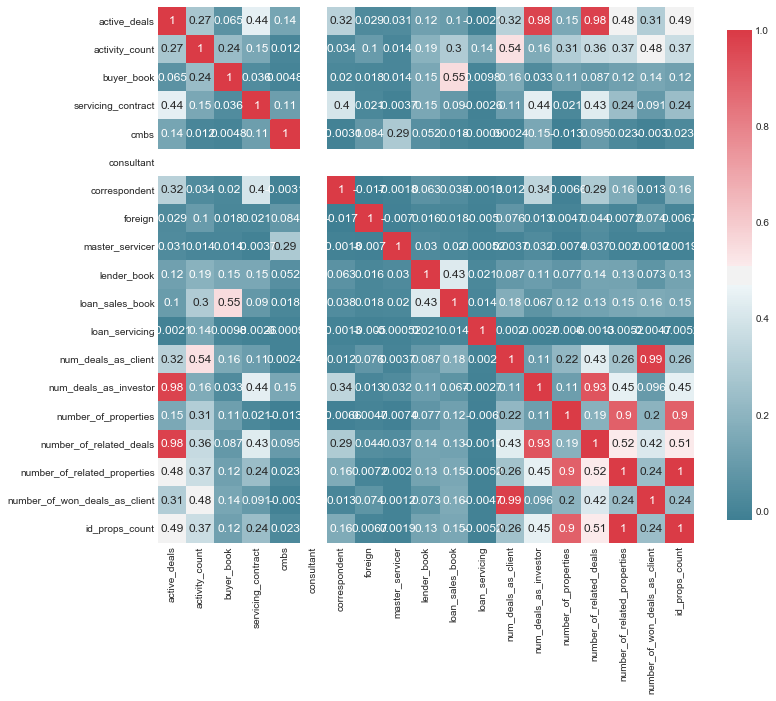

In [225]:
dx=plot_correlation_map(acc_prop_count)
plt.show(dx)

In [224]:
ax=plot_correlation_map(deal_activity)

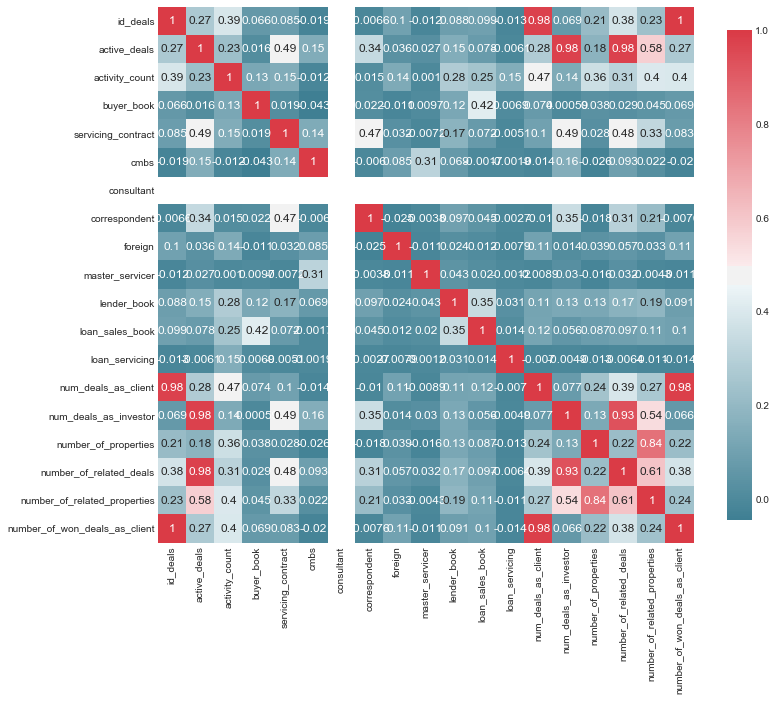

In [225]:
plt.show(ax)

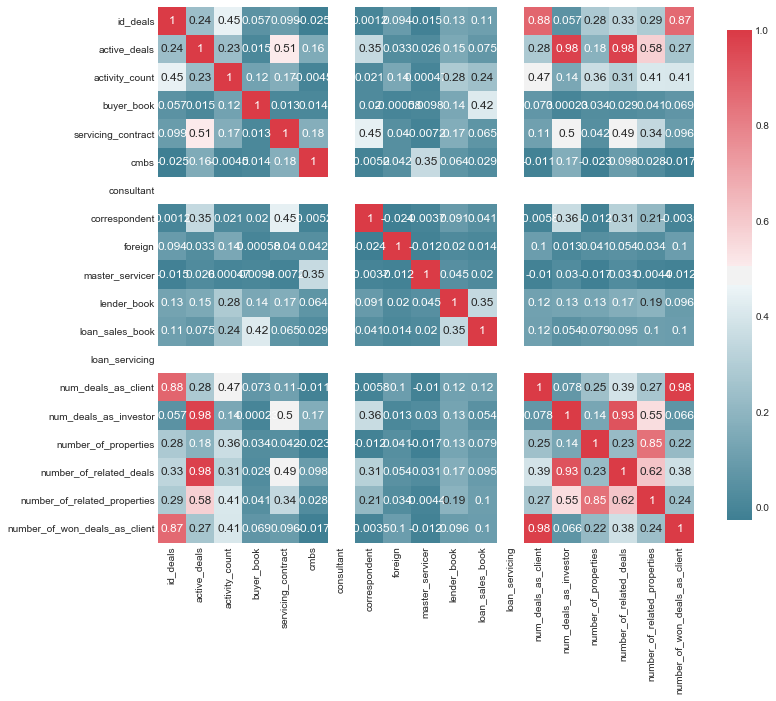

In [226]:
bx=plot_correlation_map(deal_activity_con)
plt.show(bx)

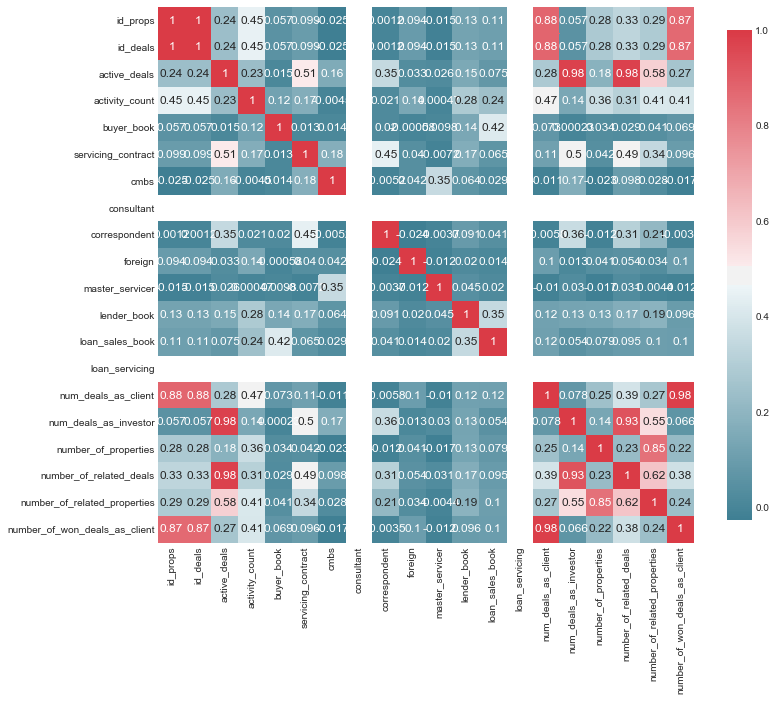

In [486]:
cx=plot_correlation_map(prop_activity)#[['id_deals','id_props','number_of_won_deals_as_client','num_deals_as_client']])
plt.show(cx)

In [226]:
test.merge(opportunities,how='inner',on='id_accs')

Empty DataFrame
Columns: [id_accs, id_deals, accounting_date, best_initial_bid, closedate, date_closed, deal_type, deal_update_flag, debt_yield, fiscal, fiscalquarter, fiscalyear, platform, property_group, property_type, best_initial_bid_interval, best_initial_bidcount, debt_yield_interval, debt_yieldcount, fiscalquarter_interval, fiscalquartercount, fiscalyear_interval, fiscalyearcount, property_type_1, prop_type]
Index: []

[0 rows x 25 columns]

In [227]:
test_acc=test.merge(accounts,how='inner',on='id_accs')

In [228]:
test_acc.head()

id_accs  active_deals  activity_count  buyer_book  \
0  0012A00002AXHJUQA5           113          203365        True   
1  0012A000023XlWaQAK           261          127948        True   
2  0012A000023Y4bYQAS           379          204360        True   
3  0012A000023XlbuQAC           284          132408        True   
4  0012A000023Xlh9QAC           299           11365        True   

   servicing_contract           investor_type   cmbs  consultant  \
0               False     Advisor/Equity Fund  False       False   
1               False  Life Insurance Company  False       False   
2               False  Life Insurance Company  False       False   
3               False     Advisor/Equity Fund  False       False   
4                True  Life Insurance Company  False       False   

   correspondent  foreign  master_servicer  lender_book  loan_sales_book  \
0          False    False            False         True             True   
1          False    False            False         True             True   
2          False    False            False         True             True   
3          False    False            False         True             True   
4           True    False            False         True             True   

   loan_servicing  num_deals_as_client  num_deals_as_investor  \
0           False                   66                     47   
1           False                   40                    221   
2           False                   92                    287   
3           False                  224                     60   
4           False                   12                    287   

   number_of_properties  number_of_related_deals  \
0                   330                      174   
1                   138                      283   
2                    86                      478   
3                   231                      384   
4                    11                      294   

   number_of_related_properties  number_of_won_deals_as_client  
0                           383                             47  
1                           276                             30  
2                           359                             72  
3                           260                            181  
4                            98                              9

In [297]:
# properties=pd.read_csv('Property_final.csv')
# properties.drop('Unnamed: 0',inplace=True,axis=1)

In [620]:
prop_label_col= ['building_status','city', 'class', 'county', 'sale_status', 'portfolio', 'market',
            'property_type_1', 'region__c']

In [17]:
from sklearn import preprocessing
label=preprocessing.LabelEncoder()
# data.loc[n_null,i]=label.fit_transform((data.loc[n_null,i].astype('category').cat.codes))
def encode_include_nans(data,columns):
    for i in columns:
        #t=X.loc[n_null,i].astype('category')
        #X.loc[n_null,i]=t.cat.codes
        #t=X[i].astype('category')
        #X[i]=t.cat.codes        
        try:
            data[i]=label.fit_transform(data[i])
        except:
            data[i]=label.fit_transform(data[i].astype('str'))
    return data
    
def encode_exclude_nans(data,columns):
    for i in columns:    
        n_null=data.loc[:,i].notnull()
        try:
            data.loc[n_null,i]=label.fit_transform(data.loc[n_null,i])
        except:
            print('exception',i)
            data.loc[n_null,i]=label.fit_transform((data.loc[n_null,i].astype('category').cat.codes))
    
    return data

In [25]:
prop_acc_con= pd.read_csv('Prop_acc_con.csv')

In [26]:
cols1=['investor_type','active_deals_interval',
       'activity_count_interval','num_deals_as_client_interval',
       'num_deals_as_investor_interval','number_of_properties_interval',
       'number_of_related_deals_interval', 'number_of_related_properties_interval',
       'number_of_won_deals_as_client_interval']
X=prop_acc_con.copy()

In [27]:
X=encode_exclude_nans(X,cols1)

In [29]:
X[cols1]

investor_type  active_deals_interval  activity_count_interval  \
0              10.0                      2                        1   
1              10.0                      2                        1   
2              10.0                      2                        1   
3              10.0                      2                        1   
4              10.0                      2                        1   
5              10.0                      2                        1   
6              10.0                      2                        1   
7              10.0                      2                        1   
8              10.0                      2                        1   
9              10.0                      2                        1   
10             10.0                      2                        1   
11             10.0                      2                        1   
12             10.0                      2                        1   
13             10.0                      2                        1   
14             10.0                      2                        1   
15             10.0                      2                        1   
16             10.0                      2                        1   
17             10.0                      2                        1   
18             10.0                      2                        1   
19             10.0                      2                        1   
20             10.0                      2                        1   
21             10.0                      2                        1   
22             10.0                      2                        1   
23             10.0                      2                        1   
24             10.0                      2                        1   
25             10.0                      2                        1   
26              9.0                      2                        1   
27              9.0                      2                        1   
28              9.0                      2                        1   
29              9.0                      2                        1   
...             ...                    ...                      ...   
9328            2.0                      2                        3   
9329            2.0                      2                        1   
9330            9.0                      3                        2   
9331            9.0                      3                        2   
9332            9.0                      1                        0   
9333            3.0                      2                        1   
9334            9.0                      3                        4   
9335            1.0                      1                        0   
9336            9.0                      3                        4   
9337            9.0                      3                        4   
9338            9.0                      3                        4   
9339            9.0                      1                        5   
9340            1.0                      4                        1   
9341            1.0                      4                        1   
9342            9.0                      3                        4   
9343            9.0                      1                        0   
9344            9.0                      4                        2   
9345            1.0                      3                        4   
9346            1.0                      3                        4   
9347            9.0                      1                        2   
9348            9.0                      4                        2   
9349            9.0                      3                        4   
9350            9.0                      1                        4   
9351            9.0                      4                        1   
9352            9.0           

In [248]:
properties.sale_status.isnull().sum()

193

In [20]:
pd.__version__

'0.22.0'

In [262]:
Account=intervals(accounts)

active_deals
active_deals 2215 0
bins= 5
  active_deals_interval  active_dealscount
0         (-0.001, 1.0]                938
1            (1.0, 2.0]                317
2            (2.0, 5.0]                482
3           (5.0, 14.0]                498
4        (14.0, 2215.0]                521
activity_count
activity_count 217301 0
bins= 6
  activity_count_interval  activity_countcount
0          (-0.001, 83.0]                  461
1           (83.0, 701.0]                  459
2         (701.0, 2354.0]                  458
3      (2354.0, 6420.333]                  459
4   (6420.333, 15160.667]                  459
5   (15160.667, 217301.0]                  460
num_deals_as_client
num_deals_as_client 333 0
bins= 3
  num_deals_as_client_interval  num_deals_as_clientcount
0              (-0.333, 111.0]                      2740
1               (111.0, 222.0]                        11
2               (222.0, 333.0]                         5
num_deals_as_investor
num_deals_as_investor

In [276]:
account_col_label=['buyer_book',
       'servicing_contract', 'investor_type', 'cmbs', 'consultant',
       'correspondent', 'foreign', 'master_servicer', 'lender_book',
       'loan_sales_book', 'loan_servicing']

In [277]:
accounts_label=encode_exclude_nans(accounts,account_col_label)

In [278]:
accounts_label

id_accs  active_deals  activity_count  buyer_book  \
0     0012A000023XlCCQA0             1            2367           1   
1     0012A000023XmOxQAK             9            7974           1   
2     0012A000023YLqwQAG           891           50161           1   
3     0012A000023XlNjQAK            34           14631           1   
4     0012A000023YBFRQA4           283          194195           1   
5     0012A000023XlQFQA0            39           23659           1   
6     0012A000023XlWaQAK           261          127948           1   
7     0012A000029wI3eQAE            14           23727           1   
8     0012A000023XmSVQA0            11            2405           1   
9     0012A00002HqXOHQA3           372            5954           1   
10    0012A000023XosfQAC            24           11039           1   
11    0012A000023YDnWQAW           606          217301           1   
12    0012A000023Xp6lQAC             3            5052           1   
13    0012A000029wIHnQAM            45           71762           1   
14    0012A000023XlSVQA0             7             882           0   
15    0012A000023XlStQAK            44           26816           1   
16    0012A000023XlZ5QAK           324           18287           1   
17    0012A000023Y9gNQAS           217          200215           1   
18    0012A000023YD7UQAW           117            8061           1   
19    0012A000023XlX9QAK            36           28756           1   
20    0012A000023Xo0OQAS           364          157298           1   
21    0012A000023XnT9QAK            20            8031           1   
22    0012A000023Y4bYQAS           379          204360           1   
23    0012A00002Bg1kGQAR            34           22117           1   
24    0012A000023XoQbQAK           278          171433           1   
25    0012A000023XnEiQAK             4           13678           1   
26    0012A000023XrdJQAS             8            5091           1   
27    0012A000023YBvSQAW          1494           30030           1   
28    0012A000023Xo53QAC            16           15885           1   
29    0012A000023Xq5FQAS             8           12309           1   
...                  ...           ...             ...         ...   
2726  0012A000026WX8UQAW             1               0           0   
2727  0012A000024GNuyQAG             0               7           1   
2728  0012A000024GNvyQAG             2             220           1   
2729  0012A000024GOFDQA4            10            6320           1   
2730  0012A000024GOriQAG             1             134           0   
2731  0012A000024GPGqQAO             0              11           1   
2732  0012A000024IzjsQAC             0               7           0   
2733  0012A000025o1UhQAI             1              16           0   
2734  0012A000026WJtSQAW             0               0           1   
2735  0012A000026WKzNQAW             0               0           1   
2736  0012A000026WMHaQAO             0               0           1   
2737  0012A000026WQFbQAO             0               0           1   
2738  0012A000026WSS7QAO             0               0           1   
2739  0012A000026WSsxQAG             0               0           1   
2740  0012A000026WUjkQAG             0              14           1   
2741  0012A000026WY7XQAW             0               0           1   
2742  0012A000026WYJYQA4             0               0           1   
2743  0012A000026WYxOQAW             0               0           1   
2744  0012A000026WaVTQA0             0               0           1   
2745  0012A000026WaiYQAS             0               0           1   
2746  0012A000026Wc3gQAC             0               0           1   
2747  0012A000027yptUQAQ             2             212           1   
2748  0012A00002821tDQAQ             2             262           1   
2749  0012A000028dxMQQAY             0               0           1   
2750  0012A000029kYObQAM             0               0           1   
2751  0012A000029kkq9QAA   

In [284]:
acc_per_prop['id_accs_count']=acc_per_prop['id_accs']
acc_per_prop.drop('id_accs',inplace=True,axis=1)

In [289]:
properties=acc_per_prop.merge(properties,on='id_props',how='right')

In [291]:
properties.loc[properties.id_accs_count.isnull(),'id_accs_count']=0

In [292]:
properties[properties.id_accs_count.isnull()]

Empty DataFrame
Columns: [id_props, id_accs_count, building_status, building_tax_expenses, id_deals, city, class, county, sale_status, portfolio, market, num_buildings, num_floors, num_parking_spaces, occupancy_rate, price_per_sq_ft, price_per_unit, property_type_1, region__c, sale_amount__c, sale_date__c, size_acres, size_sf, size_units, year_built, year_tax_1, Taxprice_1, Taxunit_1, year_ops_1, Opsprice_1, Opsunit_1, year_ops_2, Opsprice_2, Opsunit_2, year_tax_2, Taxprice_2, Taxunit_2, year_combined_1, Combinedprice_1, Combinedunit_1, year_combined_2, Combinedprice_2, Combinedunit_2, num_buildings_interval, num_buildingscount, num_floors_interval, num_floorscount, num_parking_spaces_interval, num_parking_spacescount, occupancy_rate_interval, occupancy_ratecount, price_per_sq_ft_interval, price_per_sq_ftcount, price_per_unit_interval, price_per_unitcount, sale_amount__c_interval, sale_amount__ccount, size_acres_interval, size_acrescount, size_sf_interval, size_sfcount, size_units_interval, size_unitscount, year_built_interval, year_builtcount, Taxprice_1_interval, Taxprice_1count, Opsprice_1_interval, Opsprice_1count, Opsprice_2_interval, Opsprice_2count, Taxprice_2_interval, Taxprice_2count, Combinedprice_1_interval, Combinedprice_1count, Combinedprice_2_interval, Combinedprice_2count, year_tax_1_interval, year_tax_1count, year_ops_1_interval, year_ops_1count, year_ops_2_interval, year_ops_2count, year_tax_2_interval, year_tax_2count, year_combined_1_interval, year_combined_1count, year_combined_2_interval, year_combined_2count, prop_type]
Index: []

[0 rows x 90 columns]

In [241]:
Property=properties.copy()

In [445]:
prop_nodeal.columns

Index(['id_deals_x', 'id_accs', 'accounting_date', 'best_initial_bid',
       'closedate', 'date_closed', 'deal_type', 'deal_update_flag',
       'debt_yield', 'fiscal',
       ...
       'year_ops_1_interval', 'year_ops_1count', 'year_ops_2_interval',
       'year_ops_2count', 'year_tax_2_interval', 'year_tax_2count',
       'year_combined_1_interval', 'year_combined_1count',
       'year_combined_2_interval', 'year_combined_2count'],
      dtype='object', length=143)

In [448]:
for i in prop_acc_con.columns:
    if i not in prop_nodeal.columns:
        print(i)

id
createdbyid
fiscalquarter_x
fiscalyear_x
property_type_1_x
property_type_1_y
fiscalyear_y
fiscalquarter_y


In [443]:
print(prop_acc_con.columns)

Index(['id', 'createdbyid', 'id_deals_x', 'id_props', 'id_accs',
       'accounting_date', 'best_initial_bid', 'closedate', 'date_closed',
       'deal_type',
       ...
       'year_ops_2_interval', 'year_ops_2count', 'year_tax_2_interval',
       'year_tax_2count', 'year_combined_1_interval', 'year_combined_1count',
       'year_combined_2_interval', 'year_combined_2count', 'fiscalyear_y',
       'fiscalquarter_y'],
      dtype='object', length=148)


In [466]:
prop_acc_con['property_type_1']=prop_acc_con['property_type_1_x']
prop_acc_con.drop(['property_type_1_x','property_type_1_y','fiscalquarter_x','fiscalquarter_y','fiscalyear_x','fiscalyear_y'],axis=1,inplace=True)
prop_acc_con.loc[prop_acc_con.sale_date__c.notnull(),'fiscalyear']=prop_acc_con.loc[prop_acc_con.sale_date__c.notnull(),'sale_date__c'].map(lambda x: x.split('/')[2])
prop_acc_con.loc[prop_acc_con.sale_date__c.notnull(),'fiscalquarter']=prop_acc_con.loc[prop_acc_con.sale_date__c.notnull(),'sale_date__c'].map(lambda x: math.ceil(float(x.split('/')[0])/3))
prop_acc_con['fiscalyear']=prop_acc_con['fiscalyear'].astype('float64')
prop_acc_con['fiscalquarter']=prop_acc_con['fiscalquarter'].astype('float64')

In [467]:
print(prop_acc_con.columns)

Index(['id', 'createdbyid', 'id_deals_x', 'id_props', 'id_accs',
       'accounting_date', 'best_initial_bid', 'closedate', 'date_closed',
       'deal_type',
       ...
       'year_ops_2count', 'year_tax_2_interval', 'year_tax_2count',
       'year_combined_1_interval', 'year_combined_1count',
       'year_combined_2_interval', 'year_combined_2count', 'property_type_1',
       'fiscalyear', 'fiscalquarter'],
      dtype='object', length=145)


In [468]:
for i in prop_acc_con.columns:
    if i not in prop_nodeal.columns:
        print(i)

id
createdbyid


In [91]:
# prop_acc_con.to_csv('Prop_acc_con.csv')
# prop_nodeal.to_csv('Prop_nodeal.csv')
# prop_left.to_csv('prop_left.csv')
# prop_count.to_csv('prop_count.csv')
# test_prop.to_csv('test_prop.csv')

In [9]:
prop_acc_con= pd.read_csv('Prop_acc_con.csv')
# prop_nodeal= pd.read_csv('Prop_nodeal.csv')
# test_prop=pd.read_csv('test_prop.csv')
# prop_left=pd.read_csv('prop_left.csv')

In [10]:
# prop_nodeal.drop('Unnamed: 0',axis=1,inplace=True)
prop_acc_con.drop('Unnamed: 0',axis=1,inplace=True)
# test_prop.drop('Unnamed: 0',axis=1,inplace=True)
# prop_left.drop('Unnamed: 0',axis=1,inplace=True)

In [18]:
col=['active_deals_interval','building_status']
a=encode_exclude_nans(prop_acc_con,col)

In [19]:
prop_acc_con[col]

active_deals_interval building_status
0                         2               1
1                         2               1
2                         2               1
3                         2               1
4                         2               1
5                         2               1
6                         2               1
7                         2               1
8                         2               1
9                         2               1
10                        2               1
11                        2             NaN
12                        2             NaN
13                        2             NaN
14                        2               1
15                        2               1
16                        2               1
17                        2               1
18                        2               1
19                        2               1
20                        2               1
21                        2               1
22                        2               1
23                        2               1
24                        2             NaN
25                        2               1
26                        2               1
27                        2               1
28                        2               1
29                        2             NaN
...                     ...             ...
9328                      2               1
9329                      2               1
9330                      3             NaN
9331                      3               1
9332                      1             NaN
9333                      2             NaN
9334                      3               1
9335                      1               1
9336                      3               1
9337                      3               1
9338                      3               1
9339                      1               1
9340                      4               1
9341                      4               1
9342                      3             NaN
9343                      1             NaN
9344                      4             NaN
9345                      3               1
9346                      3             NaN
9347                      1               1
9348                      4             NaN
9349                      3             NaN
9350                      1               3
9351                      4               1
9352                      4               1
9353                      3             NaN
9354                      4               1
9355                      4             NaN
9356                      0               1
9357                      4               1

[9358 rows x 2 columns]

In [471]:
prop_left.sale_status.unique()

array(['Y', 'N', nan], dtype=object)

In [108]:
property_left=prop_left[prop_left.sale_status!='N']

In [32]:
acc_property

NameError: name 'acc_property' is not defined

In [475]:
property_left.shape

(893, 90)

In [493]:
reg_col=['active_deals', 'activity_count', 'num_deals_as_client', 'number_of_properties',
       'number_of_related_deals', 'number_of_related_properties',
       'number_of_won_deals_as_client']
X=prop_activity[reg_col]
y=prop_activity['id_props_count']

In [494]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X,y)
test_acc['id_props_count'] = regr.predict(test_acc[reg_col])

In [529]:
prop_count.drop('id_deals',inplace=True,axis=1)
prop_count['id_props_count']=prop_count['id_props']

F:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
F:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [112]:
test_acc['key']='a'
property_left['key']='a'

F:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [113]:
test_prop=test_acc.merge(property_left,on='key')

In [122]:
Test_prop['id_accs']=test_prop['id_accs']

F:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [510]:
test_acc.shape

(29, 38)

In [511]:
prop_nodeal.shape

(2498, 143)

In [513]:
prop_acc_con.shape

(9358, 145)

In [535]:
prop_nodeal=prop_nodeal.merge(prop_nodeal_count,on='id_accs',how='inner')

In [526]:
prop_nodeal_count.columns

Index(['id_accs', 'id_props_count'], dtype='object')

In [536]:
prop_acc_con=prop_acc_con.merge(prop_count,on='id_accs',how='inner')

In [544]:
prop_acc_con.columns[140:]

Index(['year_combined_2_interval', 'year_combined_2count', 'property_type_1',
       'fiscalyear', 'fiscalquarter', 'id_props_count'],
      dtype='object')

In [545]:
itl=re.compile('_interval')

In [554]:
col=[]
for i in prop_nodeal.columns:
    s=itl.search(i)
    if s!= None:
        col.append(i)

In [45]:
features=['active_deals',
       'activity_count', 'buyer_book', 'servicing_contract', 'investor_type',
       'cmbs', 'consultant', 'correspondent', 'foreign','master_servicer', 'lender_book', 'loan_sales_book','loan_servicing',
        'num_deals_as_client', 'num_deals_as_investor',
        'number_of_properties', 'number_of_related_deals','number_of_related_properties', 'number_of_won_deals_as_client',
        'active_deals_interval', 'activity_count_interval','num_deals_as_client_interval','num_deals_as_investor_interval',
        'number_of_properties_interval','number_of_related_deals_interval','number_of_related_properties_interval',
        'number_of_won_deals_as_client_interval','building_status','city',
        'class', 'county', 'sale_status', 'portfolio', 'market','num_buildings', 'num_floors', 'num_parking_spaces',
        'occupancy_rate','price_per_sq_ft', 'price_per_unit', 'region__c', 'sale_amount__c','size_acres', 'size_sf',
        'year_built','year_tax_1', 'Taxprice_1', 'year_ops_1', 'Opsprice_1', 'year_ops_2', 'Opsprice_2',
        'year_tax_2', 'Taxprice_2', 'year_combined_1', 'Combinedprice_1', 'year_combined_2', 'Combinedprice_2',
          'num_buildings_interval','num_floors_interval','num_parking_spaces_interval','occupancy_rate_interval',
          'price_per_sq_ft_interval', 'price_per_unit_interval','sale_amount__c_interval', 'size_acres_interval',
        'size_sf_interval', 'year_built_interval', 'Taxprice_1_interval', 'Opsprice_1_interval', 'Opsprice_2_interval',
        'Taxprice_2_interval', 'Combinedprice_1_interval', 'Combinedprice_2_interval', 'year_tax_1_interval',
        'year_ops_1_interval', 'year_ops_2_interval', 'year_tax_2_interval', 'year_combined_1_interval',
        'year_combined_2_interval', 'property_type_1','fiscalyear', 'fiscalquarter', 'id_props_count','target']

In [607]:
prop_nodeal[features]

active_deals  activity_count  buyer_book  servicing_contract  \
0               23            6737           1                   0   
1               23            6737           1                   0   
2               23            6737           1                   0   
3               23            6737           1                   0   
4               23            6737           1                   0   
5               23            6737           1                   0   
6               23            6737           1                   0   
7               23            6737           1                   0   
8               24           42046           1                   0   
9               24           42046           1                   0   
10              24           42046           1                   0   
11              24           42046           1                   0   
12              24           42046           1                   0   
13              24           42046           1                   0   
14              24           42046           1                   0   
15              24           42046           1                   0   
16              24           42046           1                   0   
17              24           42046           1                   0   
18              24           42046           1                   0   
19              24           42046           1                   0   
20              24           42046           1                   0   
21              24           42046           1                   0   
22              24           42046           1                   0   
23              24           42046           1                   0   
24              24           42046           1                   0   
25              24           42046           1                   0   
26              24           42046           1                   0   
27              24           42046           1                   0   
28              24           42046           1                   0   
29              24           42046           1                   0   
...            ...             ...         ...                 ...   
2468             3           18941           1                   0   
2469             3           18941           1                   0   
2470             3           18941           1                   0   
2471             3           18941           1                   0   
2472             3           18941           1                   0   
2473             3           18941           1                   0   
2474             3           18941           1                   0   
2475             3           18941           1                   0   
2476             3           18941           1                   0   
2477             3           18941           1                   0   
2478             3           18941           1                   0   
2479             3           18941           1                   0   
2480             3           18941           1                   0   
2481             3           18941           1                   0   
2482             3           18941           1                   0   
2483             3           18941           1                   0   
2484             3           18941           1                   0   
2485             3           18941           1                   0   
2486             3           18941           1                   0   
2487             3           18941           1                   0   
2488             3           18941           1                   0   
2489             3           18941           1                   0   
2490             3           18941           1                   0   
2491             3           18941           1                   0   
2492             3           18941           1                   0   
2493            

In [606]:
prop_acc_con[features]

active_deals  activity_count  buyer_book  servicing_contract  \
0               44           21931           1                   0   
1               44           21931           1                   0   
2               44           21931           1                   0   
3               44           21931           1                   0   
4               44           21931           1                   0   
5               44           21931           1                   0   
6               44           21931           1                   0   
7               44           21931           1                   0   
8               44           21931           1                   0   
9               44           21931           1                   0   
10              44           21931           1                   0   
11              44           21931           1                   0   
12              44           21931           1                   0   
13              44           21931           1                   0   
14              44           21931           1                   0   
15              44           21931           1                   0   
16              44           21931           1                   0   
17              44           21931           1                   0   
18              44           21931           1                   0   
19              44           21931           1                   0   
20              44           21931           1                   0   
21              44           21931           1                   0   
22              44           21931           1                   0   
23              44           21931           1                   0   
24              44           21931           1                   0   
25              44           21931           1                   0   
26              87           50500           1                   0   
27              87           50500           1                   0   
28              87           50500           1                   0   
29              87           50500           1                   0   
...            ...             ...         ...                 ...   
9328            56           13517           1                   0   
9329          1494           30030           1                   1   
9330             5            4252           1                   0   
9331             5            4252           1                   0   
9332             2               0           0                   0   
9333            75           18585           1                   0   
9334             4            1159           1                   0   
9335             2              73           0                   0   
9336             5            1258           1                   0   
9337             5            1258           1                   0   
9338             5            1258           1                   0   
9339             2             324           1                   0   
9340             6           16352           1                   0   
9341             6           16352           1                   0   
9342             4            1023           0                   0   
9343             2               0           0                   0   
9344             7            2543           1                   0   
9345             3            2111           1                   0   
9346             3            2111           1                   0   
9347             2            2460           1                   0   
9348             6            3841           1                   0   
9349             3             900           1                   0   
9350             2            1853           1                   0   
9351             8           22896           1                   0   
9352             8           22896           1                   0   
9353            

In [560]:
prop_acc_con.id_props.nunique()

7432

In [570]:
prop_types=prop_acc_con.groupby(['prop_type'],as_index=False).agg({'property_type_1':'count'})
prop_types['prop_type_count']=prop_types['property_type_1']

In [572]:
prop_types.drop('property_type_1',axis=1,inplace=True)

In [576]:
prop_acc_con.groupby(['prop_type'],as_index=False).agg({'id_props':'count'})#.merge(prop_types,on='prop_type',how='inner')

prop_type  id_props
0           Biotech        13
1        Healthcare       119
2     Hotel-Lodging       410
3        Industrial       940
4              Land        94
5     Multi-Housing      3190
6            Office      2559
7             Other        45
8            Retail      1544
9      Self Storage       170
10  Seniors Housing       100

In [46]:
prop_nodeal['target']=0
prop_acc_con['target']=1
test_prop['target']=2
prop_nodeal=prop_nodeal[features]
prop_acc_con=prop_acc_con[features]
test_prop=test_prop[features]

In [20]:
train=pd.concat([prop_nodeal,prop_acc_con],ignore_index=True)

In [21]:
train.shape

(11856, 84)

In [64]:
test_prop.shape

(25897, 84)

In [53]:
train_label= ['active_deals_interval',
       'activity_count_interval', 'num_deals_as_client_interval',
       'num_deals_as_investor_interval', 'number_of_properties_interval',
       'number_of_related_deals_interval',
       'number_of_related_properties_interval',
       'number_of_won_deals_as_client_interval', 'building_status', 'city',
       'class', 'county', 'sale_status', 'portfolio', 'market', 'region__c', 'year_built', 'year_tax_1',
       'year_ops_1', 'year_ops_2',
       'year_tax_2', 'year_combined_1',
       'year_combined_2', 'num_buildings_interval',
       'num_floors_interval', 'num_parking_spaces_interval',
       'occupancy_rate_interval', 'price_per_sq_ft_interval',
       'price_per_unit_interval', 'sale_amount__c_interval',
       'size_acres_interval', 'size_sf_interval', 'year_built_interval',
       'Taxprice_1_interval', 'Opsprice_1_interval', 'Opsprice_2_interval',
       'Taxprice_2_interval', 'Combinedprice_1_interval',
       'Combinedprice_2_interval', 'year_tax_1_interval',
       'year_ops_1_interval', 'year_ops_2_interval', 'year_tax_2_interval',
       'year_combined_1_interval', 'year_combined_2_interval',
       'property_type_1', 'fiscalyear']

In [22]:
train.columns

Index(['active_deals', 'activity_count', 'buyer_book', 'servicing_contract',
       'investor_type', 'cmbs', 'consultant', 'correspondent', 'foreign',
       'master_servicer', 'lender_book', 'loan_sales_book', 'loan_servicing',
       'num_deals_as_client', 'num_deals_as_investor', 'number_of_properties',
       'number_of_related_deals', 'number_of_related_properties',
       'number_of_won_deals_as_client', 'active_deals_interval',
       'activity_count_interval', 'num_deals_as_client_interval',
       'num_deals_as_investor_interval', 'number_of_properties_interval',
       'number_of_related_deals_interval',
       'number_of_related_properties_interval',
       'number_of_won_deals_as_client_interval', 'building_status', 'city',
       'class', 'county', 'sale_status', 'portfolio', 'market',
       'num_buildings', 'num_floors', 'num_parking_spaces', 'occupancy_rate',
       'price_per_sq_ft', 'price_per_unit', 'region__c', 'sale_amount__c',
       'size_acres', 'size_sf', 'year

In [33]:
train=encode_exclude_nans(train,train_label)

In [65]:
Test=pd.concat([test_prop,prop_acc_con])

In [66]:
Test=encode_exclude_nans(Test,train_label)

In [69]:
Test_prop=Test[Test.target==2]

In [154]:
Test_prop[0:0]

Empty DataFrame
Columns: [active_deals, activity_count, buyer_book, servicing_contract, investor_type, cmbs, consultant, correspondent, foreign, master_servicer, lender_book, loan_sales_book, loan_servicing, num_deals_as_client, num_deals_as_investor, number_of_properties, number_of_related_deals, number_of_related_properties, number_of_won_deals_as_client, active_deals_interval, activity_count_interval, num_deals_as_client_interval, num_deals_as_investor_interval, number_of_properties_interval, number_of_related_deals_interval, number_of_related_properties_interval, number_of_won_deals_as_client_interval, building_status, city, class, county, sale_status, portfolio, market, num_buildings, num_floors, num_parking_spaces, occupancy_rate, price_per_sq_ft, price_per_unit, region__c, sale_amount__c, size_acres, size_sf, year_built, year_tax_1, Taxprice_1, year_ops_1, Opsprice_1, year_ops_2, Opsprice_2, year_tax_2, Taxprice_2, year_combined_1, Combinedprice_1, year_combined_2, Combinedprice_2, num_buildings_interval, num_floors_interval, num_parking_spaces_interval, occupancy_rate_interval, price_per_sq_ft_interval, price_per_unit_interval, sale_amount__c_interval, size_acres_interval, size_sf_interval, year_built_interval, Taxprice_1_interval, Opsprice_1_interval, Opsprice_2_interval, Taxprice_2_interval, Combinedprice_1_interval, Combinedprice_2_interval, year_tax_1_interval, year_ops_1_interval, year_ops_2_interval, year_tax_2_interval, year_combined_1_interval, year_combined_2_interval, property_type_1, fiscalyear, fiscalquarter, id_props_count, target, id_props, id_accs]
Index: []

[0 rows x 86 columns]

In [124]:
# train.to_csv('train_final.csv')
Test_prop.to_csv('Test_Prop.csv')
# train=pd.read_csv('train_final.csv').drop('Unnamed: 0',axis=1,inplace=True)

In [180]:
sub=pd.DataFrame()
for i in Test_prop.id_accs.unique():
    df=Test_prop.loc[Test_prop.id_accs==i,['id_accs','id_props','id_props_count','target']].sort_values(by='target',ascending=True)
    print('j',df.id_props_count.values[0])
    sub=pd.concat([sub,df[0:int(df.id_props_count.values[0])]])
#     except:
#         sub=pd.concat([sub,df[0:0]])

j 48.9731485364
j 30.1992752406
j 62.5195854857
j 135.857150123
j 6.57639812276
j 14.9076230263
j 143.305670705
j 21.1550195552
j 30.5366967982
j 5.11236888994
j 16.1109070616
j 65.5064458207
j 24.1589133016
j 3.63519775581
j 9.57522990923
j 48.2084232217
j 79.6217660405
j 25.4839451498
j 25.2863503945
j 158.532517792
j 25.9103944581
j 19.0505321269
j 30.7760339687
j 23.3876437444
j 28.0297754437
j 111.766111092
j 36.5168947996
j 25.9038738888
j 37.642755867


In [181]:
sub['id_prop']=sub['id_props']
sub.drop(['id_props_count','target','id_props'],axis=1,inplace=True)

In [182]:
sub.shape

(1280, 2)

In [170]:
df=Test_prop.loc[Test_prop.id_accs=='0012A000023XlbuQAC',['id_accs','id_props','id_props_count','target']].sort_values(by='target',ascending=True)
df[0:20]
df.id_props_count.values[0]

135.85715012302768

In [166]:
Test_prop.groupby('id_accs',as_index=False).agg({'id_props':'count'})

id_accs  id_props
0   0012A000023XlWaQAK       893
1   0012A000023XlbuQAC       893
2   0012A000023Xlh9QAC       893
3   0012A000023XlhdQAC       893
4   0012A000023XlkNQAS       893
5   0012A000023XlnWQAS       893
6   0012A000023XlnqQAC       893
7   0012A000023Xm35QAC       893
8   0012A000023XmRwQAK       893
9   0012A000023XmmFQAS       893
10  0012A000023Xo0OQAS       893
11  0012A000023XoRjQAK       893
12  0012A000023Xp4LQAS       893
13  0012A000023Xp5LQAS       893
14  0012A000023XrTNQA0       893
15  0012A000023XwMRQA0       893
16  0012A000023Y1rtQAC       893
17  0012A000023Y4bYQAS       893
18  0012A000023Y9gNQAS       893
19  0012A000023YAupQAG       893
20  0012A000023YB67QAG       893
21  0012A000023YBFRQA4       893
22  0012A000023YDnWQAW       893
23  0012A000023YKsuQAG       893
24  0012A000023YLFWQA4       893
25  0012A000026WwqxQAC       893
26  0012A000029ZzX1QAK       893
27  0012A00002AXHJUQA5       893
28  0012A00002JF3YmQAL       893

In [183]:
sub.to_csv('sub2.csv',index=False)

In [35]:
train.columns

Index(['active_deals', 'activity_count', 'buyer_book', 'servicing_contract',
       'investor_type', 'cmbs', 'consultant', 'correspondent', 'foreign',
       'master_servicer', 'lender_book', 'loan_sales_book', 'loan_servicing',
       'num_deals_as_client', 'num_deals_as_investor', 'number_of_properties',
       'number_of_related_deals', 'number_of_related_properties',
       'number_of_won_deals_as_client', 'active_deals_interval',
       'activity_count_interval', 'num_deals_as_client_interval',
       'num_deals_as_investor_interval', 'number_of_properties_interval',
       'number_of_related_deals_interval',
       'number_of_related_properties_interval',
       'number_of_won_deals_as_client_interval', 'building_status', 'city',
       'class', 'county', 'sale_status', 'portfolio', 'market',
       'num_buildings', 'num_floors', 'num_parking_spaces', 'occupancy_rate',
       'price_per_sq_ft', 'price_per_unit', 'region__c', 'sale_amount__c',
       'size_acres', 'size_sf', 'year

In [26]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [27]:
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn import preprocessing

F:\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [28]:
from sklearn.feature_selection import RFECV
import operator

In [36]:
target=train['target']
X_train=train.drop('target',axis=1,inplace=False)

In [71]:
Test_prop.drop('target',axis=1,inplace=True)

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x0000000C602C5668>>
Traceback (most recent call last):
  File "F:\Anaconda\lib\site-packages\xgboost-0.7-py3.6.egg\xgboost\core.py", line 366, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'
F:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [74]:
X_test=Test_prop[X_train.columns]

In [73]:
X_train.columns

Index(['active_deals', 'activity_count', 'buyer_book', 'servicing_contract',
       'investor_type', 'cmbs', 'consultant', 'correspondent', 'foreign',
       'master_servicer', 'lender_book', 'loan_sales_book', 'loan_servicing',
       'num_deals_as_client', 'num_deals_as_investor', 'number_of_properties',
       'number_of_related_deals', 'number_of_related_properties',
       'number_of_won_deals_as_client', 'active_deals_interval',
       'activity_count_interval', 'num_deals_as_client_interval',
       'num_deals_as_investor_interval', 'number_of_properties_interval',
       'number_of_related_deals_interval',
       'number_of_related_properties_interval',
       'number_of_won_deals_as_client_interval', 'building_status', 'city',
       'class', 'county', 'sale_status', 'portfolio', 'market',
       'num_buildings', 'num_floors', 'num_parking_spaces', 'occupancy_rate',
       'price_per_sq_ft', 'price_per_unit', 'region__c', 'sale_amount__c',
       'size_acres', 'size_sf', 'year

In [75]:
xgtest= xgb.DMatrix(X_test.values)

In [76]:
predict=model.predict(xgtest)

In [89]:
len(np.unique(predict))

4632

In [95]:
predict

array([ 0.99987805,  0.99984312,  0.99987853, ...,  0.99992561,
        0.9999274 ,  0.99992561], dtype=float32)

In [96]:
Test_prop['target']=predict

F:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [98]:
Test_prop.to_csv('test_pred.csv')

In [660]:
train_X, test_X, train_target, test_target= train_test_split(X_train , target, train_size = 0.7,stratify=train['target'])

In [668]:
xgb1 = XGBClassifier(learning_rate =0.1,n_estimators=80,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,
 objective= 'binary:logistic')
xgb1.fit(train_X.astype('float64'),train_target,eval_metric='auc')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=80,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

In [675]:
dtest_predictions = xgb1.predict(test_X.astype('float64'))  
dtest_predprob = xgb1.predict_proba(test_X.astype('float64'))[:,1]
#Print model report:
print("\nModel Report")
print("Accuracy on Test set: %.4g" % preprocessing.metrics.accuracy_score(test_target.values, dtest_predictions))
print("AUC Score on test: %f" % preprocessing.metrics.roc_auc_score(test_target, dtest_predprob))


Model Report


AttributeError: module 'sklearn.preprocessing' has no attribute 'metrics'

In [37]:
params={'objective': 'binary:logistic','eval_metric': 'auc', 'scale_pos_weight':0.3,'silent':0}   
xgtrain = xgb.DMatrix(X_train.values, label=target.values)
# xgtest= xgb.DMatrix(test_X.values,label=test_target.values) 

watchlist = [(xgtrain, 'train')]
num_round=80

model=xgb.train(params,xgtrain,num_round,watchlist)

[0]	train-auc:0.99827
[1]	train-auc:0.999371
[2]	train-auc:0.999381
[3]	train-auc:0.999472
[4]	train-auc:0.999497
[5]	train-auc:0.999511
[6]	train-auc:0.999513
[7]	train-auc:0.999952
[8]	train-auc:0.999979
[9]	train-auc:0.999988
[10]	train-auc:0.999994
[11]	train-auc:0.999996
[12]	train-auc:0.999998
[13]	train-auc:0.999999
[14]	train-auc:0.999999
[15]	train-auc:0.999999
[16]	train-auc:1
[17]	train-auc:1
[18]	train-auc:1
[19]	train-auc:1
[20]	train-auc:1
[21]	train-auc:1
[22]	train-auc:1
[23]	train-auc:1
[24]	train-auc:1
[25]	train-auc:1
[26]	train-auc:1
[27]	train-auc:1
[28]	train-auc:1
[29]	train-auc:1
[30]	train-auc:1
[31]	train-auc:1
[32]	train-auc:1
[33]	train-auc:1
[34]	train-auc:1
[35]	train-auc:1
[36]	train-auc:1
[37]	train-auc:1
[38]	train-auc:1
[39]	train-auc:1
[40]	train-auc:1
[41]	train-auc:1
[42]	train-auc:1
[43]	train-auc:1
[44]	train-auc:1
[45]	train-auc:1
[46]	train-auc:1
[47]	train-auc:1
[48]	train-auc:1
[49]	train-auc:1
[50]	train-auc:1
[51]	train-auc:1
[52]	train-auc:

In [664]:
# params={'objective': 'binary:logistic','eval_metric': 'auc', 'scale_pos_weight':0.3,'silent':0}   
# xgtrain = xgb.DMatrix(train_X.values, label=train_target.values)
# xgtest= xgb.DMatrix(test_X.values,label=test_target.values) 

# watchlist = [(xgtest, 'eval'), (xgtrain, 'train')]
# num_round=100

model=xgb.train(params,xgtrain,num_round,watchlist)

[0]	eval-auc:0.997991	train-auc:0.99909
[1]	eval-auc:0.998428	train-auc:0.99943
[2]	eval-auc:0.998548	train-auc:0.999494
[3]	eval-auc:0.998695	train-auc:0.999532
[4]	eval-auc:0.999052	train-auc:0.999615
[5]	eval-auc:0.999083	train-auc:0.999631
[6]	eval-auc:0.999082	train-auc:0.999638
[7]	eval-auc:0.999091	train-auc:0.999648
[8]	eval-auc:0.999752	train-auc:0.999935
[9]	eval-auc:0.999836	train-auc:0.999974
[10]	eval-auc:0.999866	train-auc:0.999984
[11]	eval-auc:0.999874	train-auc:0.99999
[12]	eval-auc:0.99988	train-auc:0.999993
[13]	eval-auc:0.999886	train-auc:0.999995
[14]	eval-auc:0.999909	train-auc:0.999997
[15]	eval-auc:0.999906	train-auc:0.999998
[16]	eval-auc:0.999913	train-auc:0.999999
[17]	eval-auc:0.999923	train-auc:0.999999
[18]	eval-auc:0.999928	train-auc:1
[19]	eval-auc:0.999928	train-auc:1
[20]	eval-auc:0.999934	train-auc:1
[21]	eval-auc:0.999942	train-auc:1
[22]	eval-auc:0.999947	train-auc:1
[23]	eval-auc:0.999951	train-auc:1
[24]	eval-auc:0.999954	train-auc:1
[25]	eval-auc

In [184]:
2272/365

6.2246575342465755

In [34]:
ls

 Volume in drive C has no label.
 Volume Serial Number is FC37-C526

 Directory of C:\Users\Vashi NSIT\Desktop\Data Science\Kaggle\Affine

26-08-2018  17:46    <DIR>          .
26-08-2018  17:46    <DIR>          ..
25-08-2018  07:03    <DIR>          .ipynb_checkpoints
25-08-2018  07:08        27,323,338 acc_prop_tot.csv
25-08-2018  07:15        29,429,768 acc_prop_total.csv
20-07-2018  17:25           332,599 Accounts.csv
20-07-2018  17:45         5,416,980 Accounts_properties.csv
25-08-2018  07:50           804,421 Affine.ipynb
03-08-2018  17:19         2,592,035 bb020fc4-9-Dataset.zip
23-08-2018  16:37           564,845 Copy of Affine.ipynb
02-08-2018  03:17            14,080 Data_dictionary932a5c1.xlsx
20-07-2018  17:29         1,988,174 Deals_to_Properties.csv
25-08-2018  10:43           122,672 market_properties.csv
25-08-2018  10:51           123,452 market_properties_2.csv
25-08-2018  11:00            41,396 market_properties_2_3.csv
25-08-2018  20:22           122,672 market_

In [36]:
test_pred=pd.read_csv('test_pred.csv')

In [40]:
test_pred.columns

Index(['id_accs', 'active_deals', 'activity_count', 'buyer_book',
       'servicing_contract', 'investor_type', 'cmbs', 'consultant',
       'correspondent', 'foreign',
       ...
       '8', '9', '10', '11', '12', '13', '14', '15', '16', '17'],
      dtype='object', length=154)

In [58]:
# test_pred.loc[:,'max_prob']=test_pred.loc[:,[str(i) for i in range(0,18)]].max(axis=1)
sort_predi=test_pred[['id_accs','id_props','props_count_cor2','max_prob']].sort_values(by='max_prob',ascending=False)
# sort_pred['comb']=sort_pred['max_prob'].astype('str')+sort_pred['id_props']
# com_prop=sort_pred.loc[sort_pred.comb.duplicated(),'comb'].unique()

In [64]:
len(com_prop)

15583

In [42]:
# test_pred.loc[:,'max_prob']=test_pred.loc[:,[str(i) for i in range(0,18)]].max(axis=1)
sort_predi=test_pred[['id_accs','id_props','props_count_cor2','max_prob']].sort_values(by='max_prob',ascending=False)
# sort_pred['comb']=sort_pred['max_prob'].astype('str')+sort_pred['id_props']
# com_prop=sort_pred.loc[sort_pred.comb.duplicated(),'comb'].unique()
prop={}
j=0
k=0
e=0
mkt_prop=pd.DataFrame()
for i,row in enumerate(sort_pred.iterrows()):
  print(i)
  try:
    prop[row[1].id_accs]=prop.get(row[1].id_accs)+1
  except:
    j=j+1
    print(j)
    prop[row[1].id_accs]=1  
  if prop.get(row[1].id_accs) < (row[1].props_count_cor2+1):
    mkt_prop=pd.concat([mkt_prop,row[1]],axis=1)
  if row[1].comb in com_prop :
    e=e+1
    sort_pred.loc[sort_pred.id_accs==row[1].id_accs,'props_count_cor2']=sort_pred.loc[sort_pred.id_accs==row[1].id_accs,'props_count_cor2']+1

0
1
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
2
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
3
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275


In [80]:
mkt_prop.shape

(2854, 5)

In [44]:
mkt_prop=mkt_prop.T

In [78]:
mkt_prop.id_props.nunique()

1003

In [46]:
mkt_prop.to_csv('mkt_prop.csv')

In [49]:
mkt_prop.id_accs.nunique()

27

In [50]:
mkt_prop.id_props.nunique()

1003

In [51]:
test_pred.id_accs.nunique()

27

In [52]:
test_pred.id_props.nunique()

3685

In [57]:
sort_pred.props_count_cor2.unique()

array([ 100,  136,  103,   74,   46, 3717, 3725, 3721, 3770, 2049,   20,
        160, 3976, 3829, 3866, 1486,   55,   76, 3747, 3742,  171, 3862,
       3934, 3811, 3823,  170], dtype=int64)

In [55]:
mkt_prop.props_count_cor2.unique()

array([99, 134, 102, 74, 46, 32, 40, 36, 85, 25, 20, 160, 291, 144, 181,
       64, 55, 76, 62, 57, 171, 177, 249, 126, 138, 170], dtype=object)

In [70]:
dff=pd.DataFrame()
for i in sort_pred.loc[sort_pred.props_count_cor2==3717,:].comb.unique():
    print(i)
    dff=pd.concat([dff,sort_pred.loc[sort_pred.comb==i,:]])


0.9992022a0I2A00000Y5rX7UAJ
0.9991283a0I2A00000XQL1DUAX
0.99863833a0I2A00000XyIgiUAF
0.9986286a0I2A00000XwSpkUAF
0.9985323a0I2A00000XQKzEUAX
0.9985044a0I2A00000YrXX0UAN
0.9985044a0I2A00000XQLmbUAH
0.9985039a0I2A00000XQJ4dUAH
0.9983479a0I2A00000XxlrGUAR
0.99828666a0I2A00000XQJqlUAH
0.9981427a0I2A00000XQIEBUA5
0.9981324a0I2A00000XQJQfUAP
0.9980519a0I2A00000XQIQvUAP
0.9980107a0I2A00000Y66UyUAJ
0.99794656a0I2A00000XQLATUA5
0.9978738a0I2A00000XQGrBUAX
0.9978573a0I2A00000ZGpaqUAD
0.99780935a0I2A00000Y6fIwUAJ
0.997733a0I2A00000YJ9deUAD
0.9976382a0I2A00000XQJ9jUAH
0.99762267a0I2A00000XQM74UAH
0.99761045a0I2A00000YGARVUA5
0.99756706a0I2A00000XQHhvUAH
0.9974583a0I2A00000YIflbUAD
0.99741495a0I2A00000ZGLHjUAP
0.9973972a0I2A00000XuEdDUAV
0.99739575a0I2A00000XQHB8UAP
0.99732447a0I2A00000ZGT8TUAX
0.997239a0I2A00000ZGWMaUAP
0.9970981a0I2A00000XQIObUAP
0.9970765a0I2A00000XQJtfUAH
0.99701846a0I2A00000Y5tpyUAB
0.9969758a0I2A00000XQJRkUAP
0.9969277a0I2A00000XQIrVUAX
0.99667144a0I2A00000XQJyRUAX
0.9966427a

In [75]:
dff.comb.value_counts().sum()

15930

In [59]:
sort_predi.props_count_cor2.unique()

array([ 99, 134, 102,  74,  46,  32,  40,  36,  85,  25,  20, 160, 291,
       144, 181,  64,  55,  76,  62,  57, 171, 177, 249, 126, 138, 170], dtype=int64)

In [83]:
def encode_exclude_nans(data):
    for i in data:    
        n_null=data.loc[:,i].notnull()
        try:
#             print(i)
            data.loc[n_null,i]=label.fit_transform(data.loc[n_null,i])
        except:
#             print('exception',i)
            data.loc[n_null,i]=label.fit_transform((data.loc[n_null,i].astype('category').cat.codes))
    
    return data

def fillnans_unique(data):
    #a=np.arange(255,1000)
    for l,i in enumerate(data):
        data.loc[data[i].isna(),i]=data.loc[data[i].isna(),i].apply(lambda z: rnd.randint(data[i].min(),data[i].max()))
    return data
        #for k,j in enumerate(data[i].isna()):
         #   if j==True:
          #      data[i][k]=rnd.choice(a)

In [81]:
acc_prop_tot=pd.read_csv('acc_prop_tot.csv')
acc_prop_tot.drop('Unnamed: 0',axis=1,inplace=True)

In [84]:
inv_prop=acc_prop_tot.groupby(['investor_type'], as_index=False).agg({'id_accs':'count'})
inv_prop['p3']=inv_prop['id_accs']
inv_prop.drop('id_accs',axis=1,inplace=True)
prop_type=acc_prop_tot.groupby(['property_type_1'], as_index=False).agg({'id_accs':'count'})
prop_type['p2']=prop_type['id_accs']
prop_type.drop('id_accs',axis=1,inplace=True)
inv_acc=acc_prop_tot.groupby(['investor_type','property_type_1'], as_index= False).agg({'id_accs':'count'})
inv_acc['p1']=inv_acc['id_accs']
inv_acc.drop('id_accs',axis=1,inplace=True)
investor_property=inv_acc.merge(inv_prop,on='investor_type',how='inner')
investor_property=investor_property.merge(prop_type,on='property_type_1',how='inner')
investor_property['prop_inv_ratio']=(investor_property['p1']/investor_property['p2'])/investor_property['p3']
investor_property.drop(['p1','p3','p2'],axis=1,inplace=True)
investor_property=intervals(investor_property)

prop_inv_ratio
prop_inv_ratio 0.000588928150766 2.78822121524e-07
bins= 6
    prop_inv_ratio_interval  prop_inv_ratiocount
0  (-0.000999721, 2.14e-05]                   24
1      (2.14e-05, 3.16e-05]                   23
2      (3.16e-05, 3.87e-05]                   23
3      (3.87e-05, 4.65e-05]                   23
4      (4.65e-05, 7.41e-05]                   23
5      (7.41e-05, 0.000589]                   23


In [86]:
acc_prop_total=pd.read_csv('acc_prop_total.csv')
acc_prop_total.drop('Unnamed: 0',axis=1,inplace=True)

In [87]:
test_acc_prop=pd.read_csv('test_acc_prop.csv')
test_acc_prop.drop('Unnamed: 0',axis=1,inplace=True)

F:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (44,45,69,72,75,78,81,84,89,90,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [88]:
col=[ 'investor_type', 'buyer_book',
       'servicing_contract', 'cmbs', 'consultant',
       'correspondent', 'foreign', 'master_servicer', 'lender_book',
       'loan_sales_book', 'loan_servicing','active_deals_interval',
       'activity_count_interval','num_deals_as_client_interval','num_deals_as_investor_interval', 
       'number_of_properties_interval', 'number_of_related_deals_interval', 
       'number_of_related_properties_interval','number_of_won_deals_as_client_interval', 'building_status',
       'city','class', 'county', 'portfolio', 'market','property_type_1', 'region__c',
       'num_buildings_interval', 'num_floors_interval', 'num_parking_spaces_interval',
       'occupancy_rate_interval', 'price_per_sq_ft_interval',
       'price_per_unit_interval', 'sale_amount__c_interval',
       'size_acres_interval', 'size_sf_interval', 'size_units_interval', 
       'year_built_interval', 'Taxprice_1_interval', 'Opsprice_1_interval', 
       'Opsprice_2_interval', 'Opsprice_2count', 'Taxprice_2_interval',
       'Combinedprice_1_interval','Combinedprice_2_interval',
       'year_tax_1_interval', 'year_ops_1_interval', 'year_ops_2_interval', 
       'year_tax_2_interval', 'year_combined_1_interval', 'year_combined_2_interval',
       'fiscalyear', 'fiscalquarter', 'prop_acc_count_interval','prop_inv_ratio_interval']

In [89]:
train=acc_prop_total[col]

In [90]:
train=encode_exclude_nans(train)
# train=fillnans_unique(train)

F:\Anaconda\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [91]:
test_acc_prop['prop_acc_count_interval']=4
test_acc_prop=test_acc_prop.merge(investor_property,on=('investor_type','property_type_1'),how='left')
Test_Acc_Prob=test_acc_prop[col]
Test_Acc_Prob.to_csv('Test_Acc_Prob.csv')
Test_Acc_Prob=pd.read_csv('Test_Acc_Prob.csv')
Test_Acc_Prob.drop('Unnamed: 0',axis=1,inplace=True)
Test_Acc_Prob=encode_exclude_nans(Test_Acc_Prob)
Test_Acc_Prob.prop_acc_count_interval=4
# test_cluster=fillnans_unique(Test_Acc_Prob)

In [92]:
train.to_csv('train_cluster.csv')

In [94]:
Test_Acc_Prob.to_csv('test_cluster.csv')

In [105]:
train_test=pd.concat([train,Test_Acc_Prob])

In [144]:
train_test.investor_type.unique()

array([10, 13, 3, 1, 12, 17, 2, 8, 5, nan, 0, 6, 4, 15, 11, 9, 14, 7, 16], dtype=object)

In [97]:
test_hot=pd.get_dummies(Test_Acc_Prob,dummy_na=True)

In [131]:
Test_Acc_Prob.shape

(106865, 55)

In [104]:
Test_Acc_Prob.head()

investor_type  buyer_book  servicing_contract  cmbs  consultant  \
0              0           0                   0     0           0   
1              0           0                   0     0           0   
2              0           0                   0     0           0   
3              0           0                   0     0           0   
4              0           0                   0     0           0   

   correspondent  foreign  master_servicer  lender_book  loan_sales_book  \
0              0        0                0            1                0   
1              0        0                0            1                0   
2              0        0                0            1                0   
3              0        0                0            1                0   
4              0        0                0            1                0   

            ...            year_tax_1_interval  year_ops_1_interval  \
0           ...                            NaN                  NaN   
1           ...                              1                    0   
2           ...                            NaN                  NaN   
3           ...                              0                  NaN   
4           ...                            NaN                  NaN   

   year_ops_2_interval  year_tax_2_interval  year_combined_1_interval  \
0                  NaN                  NaN                       NaN   
1                    3                  NaN                       NaN   
2                  NaN                  NaN                       NaN   
3                  NaN                  NaN                       NaN   
4                  NaN                  NaN                       NaN   

   year_combined_2_interval  fiscalyear  fiscalquarter  \
0                       NaN        26.0            3.0   
1                       NaN        26.0            2.0   
2                       NaN        26.0            0.0   
3                       NaN        15.0            1.0   
4                       NaN         NaN            NaN   

   prop_acc_count_interval prop_inv_ratio_interval  
0                        4                       2  
1                        4                       1  
2                        4                     NaN  
3                        4                       3  
4                        4                       3  

[5 rows x 55 columns]

In [101]:
train.head()

investor_type  buyer_book  servicing_contract  cmbs  consultant  \
0            10           1                   0     0           0   
1            13           1                   0     0           0   
2             3           1                   1     0           0   
3            10           1                   0     0           0   
4            13           1                   0     0           0   

   correspondent  foreign  master_servicer  lender_book  loan_sales_book  \
0              0        0                0            0                0   
1              0        0                0            1                1   
2              0        0                0            1                1   
3              0        0                0            1                1   
4              0        0                0            1                1   

            ...            year_tax_1_interval  year_ops_1_interval  \
0           ...                            NaN                  NaN   
1           ...                            NaN                  NaN   
2           ...                            NaN                  NaN   
3           ...                            NaN                  NaN   
4           ...                              0                  NaN   

   year_ops_2_interval  year_tax_2_interval  year_combined_1_interval  \
0                  NaN                  NaN                       NaN   
1                  NaN                  NaN                       NaN   
2                  NaN                  NaN                       NaN   
3                  NaN                  NaN                       NaN   
4                  NaN                  NaN                         1   

   year_combined_2_interval  fiscalyear  fiscalquarter  \
0                       NaN        25.0            1.0   
1                       NaN        25.0            1.0   
2                       NaN        25.0            1.0   
3                       NaN        25.0            1.0   
4                       NaN        27.0            3.0   

   prop_acc_count_interval prop_inv_ratio_interval  
0                        0                       4  
1                        4                       0  
2                        2                       4  
3                        4                       4  
4                        4                       0  

[5 rows x 55 columns]

In [115]:
train_test[24448:].head()

investor_type  buyer_book  servicing_contract  cmbs  consultant  \
0             0           0                   0     0           0   
1             0           0                   0     0           0   
2             0           0                   0     0           0   
3             0           0                   0     0           0   
4             0           0                   0     0           0   

   correspondent  foreign  master_servicer  lender_book  loan_sales_book  \
0              0        0                0            1                0   
1              0        0                0            1                0   
2              0        0                0            1                0   
3              0        0                0            1                0   
4              0        0                0            1                0   

            ...            year_tax_1_interval  year_ops_1_interval  \
0           ...                            NaN                  NaN   
1           ...                              1                    0   
2           ...                            NaN                  NaN   
3           ...                              0                  NaN   
4           ...                            NaN                  NaN   

   year_ops_2_interval  year_tax_2_interval  year_combined_1_interval  \
0                  NaN                  NaN                       NaN   
1                    3                  NaN                       NaN   
2                  NaN                  NaN                       NaN   
3                  NaN                  NaN                       NaN   
4                  NaN                  NaN                       NaN   

   year_combined_2_interval  fiscalyear  fiscalquarter  \
0                       NaN        26.0            3.0   
1                       NaN        26.0            2.0   
2                       NaN        26.0            0.0   
3                       NaN        15.0            1.0   
4                       NaN         NaN            NaN   

   prop_acc_count_interval prop_inv_ratio_interval  
0                        4                       2  
1                        4                       1  
2                        4                     NaN  
3                        4                       3  
4                        4                       3  

[5 rows x 55 columns]

In [110]:
train_test_hot=pd.get_dummies(train_test,dummy_na=True)

In [112]:
train_cluster=train_test_hot[0:24448]
test_cluster=train_test_hot[24448:]

In [118]:
train_cluster.to_csv('Train_Cluster.csv')

In [117]:
test_cluster.to_csv('Test_Cluster.csv')

In [146]:
train_cluster.drop(['fiscalyear','fiscalquarter'],axis=1,inplace=True)
test_cluster.drop(['fiscalyear','fiscalquarter'],axis=1,inplace=True)

F:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
F:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [148]:
train_cluster.isnull().sum().sum()

0

In [119]:
from sklearn.cluster import KMeans
# import numpy as np

In [169]:
kmeans_500 = KMeans(n_clusters=500, random_state=0).fit(train_cluster)

In [151]:
kmeans.inertia_ #20

205916324.5652464

In [153]:
kmeans.inertia_ # 50

68917120.823311672

In [155]:
kmeans.inertia_ # 100

27373704.684216302

In [157]:
kmeans_150.inertia_

16388703.264587849

In [159]:
kmeans_250.inertia_

8087872.5418608719

In [170]:
kmeans_500.inertia_

2881220.8850938338

In [259]:
Y=kmeans_500.transform(test_cluster)

In [218]:
y=kmeans_500.predict(test_cluster)
y[0:10]

array([322, 445, 445, 108, 108, 108, 108, 474,   8,  15])

In [222]:
Y=np.sort(Y)

In [240]:
clust=pd.DataFrame(Y)

In [239]:
len(set(clust[0]))

58666

In [264]:
test_pred=pd.concat([test_acc_prop,clust], axis=1)

In [265]:
test_pred.loc[:,'max_prob']=test_pred.loc[:,[i for i in range(0,500)]].min(axis=1)
# test_pred['next_prob']=test_pred[1]-test_pred[0]
# sort_pred=test_pred[['id_accs','id_props','props_count_cor2','max_prob']].sort_values(by=['max_prob','props_count_cor2'],ascending=True)
sort_pred['comb']=sort_pred['max_prob'].astype('str')+sort_pred['id_props']+sort_pred['props_count_cor2'].astype('str')
com_prop=sort_pred.loc[sort_pred.comb.duplicated(),'comb'].unique()

F:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  if __name__ == '__main__':
F:\Anaconda\lib\site-packages\pandas\core\indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [4]:
sort_pred.comb.nunique()

103180

In [200]:
sort_pred.to_csv('sort_pred1.csv')

In [2]:
sort_pred=pd.read_csv('sort_pred1.csv')

In [6]:
sort_pred.head()

Unnamed: 0             id_accs            id_props  props_count_cor2  \
0       16993  0012A000023Xlh9QAC  a0I2A00000XQT1BUAX                99   
1       16575  0012A000023Xlh9QAC  a0I2A00000XQLGIUA5                99   
2       17860  0012A000023Xlh9QAC  a0I2A00000YrQiaUAF                99   
3       20678  0012A000023XlhdQAC  a0I2A00000XQT1BUAX               126   
5        5938  0012A000023XlWaQAK  a0I2A00000XQT1BUAX               138   

   max_prob                                comb  
0  6.226467    6.2264668062a0I2A00000XQT1BUAX99  
1  6.258505   6.25850532385a0I2A00000XQLGIUA599  
2  6.421492   6.42149169239a0I2A00000YrQiaUAF99  
3  6.493758  6.49375768632a0I2A00000XQT1BUAX126  
5  6.493758  6.49375768632a0I2A00000XQT1BUAX138

In [28]:
prop={}
j=0
k=0
e=0
mkt_prop=pd.DataFrame()
for i,row in enumerate(sort_pred.iterrows()):
  if row[1].id_props !=np.nan:  
      try:
        prop[row[1].id_accs]=prop.get(row[1].id_accs)+1
      except:
        j=j+1
        print(j)
        prop[row[1].id_accs]=1  
      if prop.get(row[1].id_accs) < (row[1].props_count_cor2+1)*3:
        e=e+1
        
        mkt_prop=pd.concat([mkt_prop,row[1]],axis=1)
        sort_pred.loc[sort_pred.id_props==row[1].id_props,'id_props']==np.nan
        print(e)


1
1
2
3
2
4
3
5
4
6
5
7
8
9
10
11
12
6
13
7
14
8
15
9
16
10
17
11
18
12
19
13
20
14
21
22
23
15
24
25
26
27
28
29
30
31
32
33
16
34
35
36
37
38
17
39
18
40
19
41
20
42
21
43
44
45
46
47
48
49
50
51
52
22
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
23
142
143
144
145
146
147
148
24
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
25
211
26
212
27
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259


In [29]:
mkt_prop=mkt_prop.T

In [25]:
mkt_prop=mkt_prop[['id_accs','id_props']]


In [30]:
mkt_prop.id_props.nunique()

875

In [27]:
mkt_prop.to_csv('mkt_props3.csv')